In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class']=(df['class']=='g').astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [5]:
df['class'].unique()

array([1, 0])

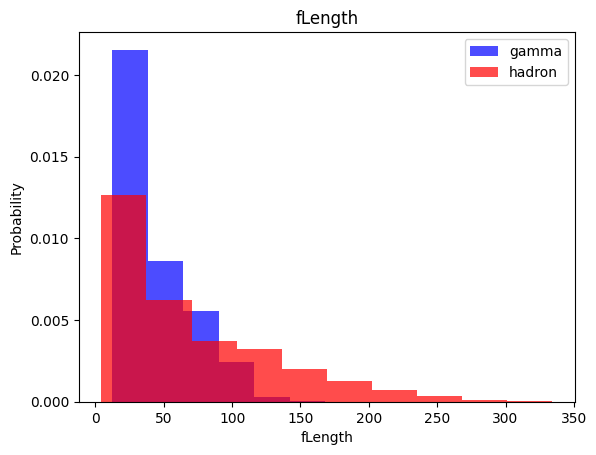

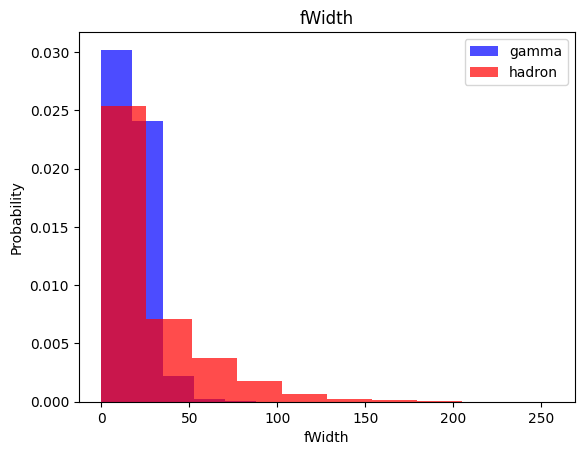

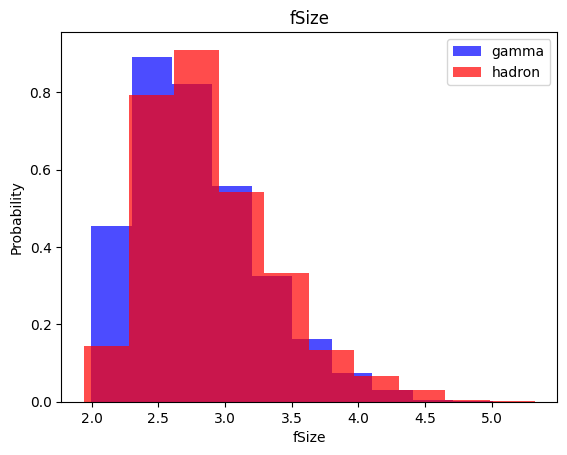

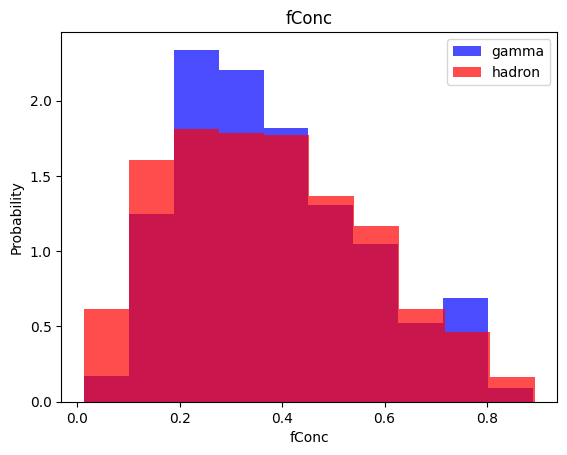

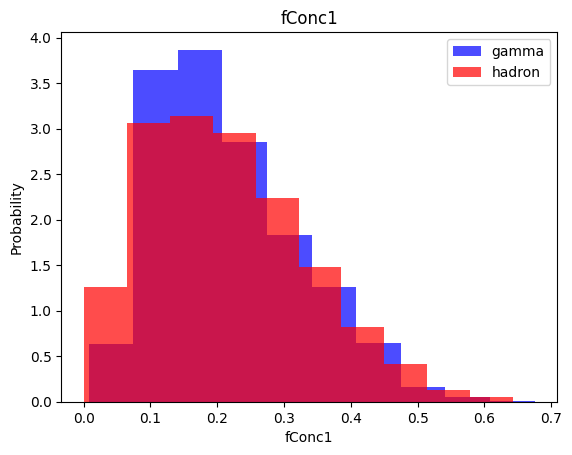

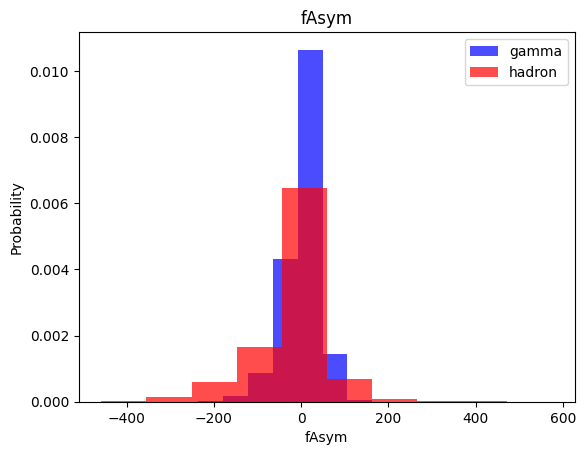

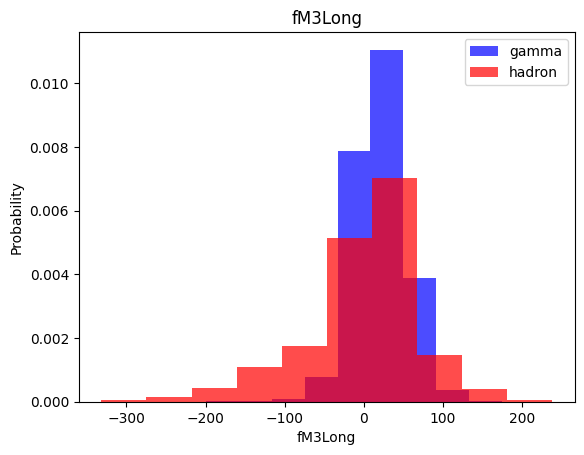

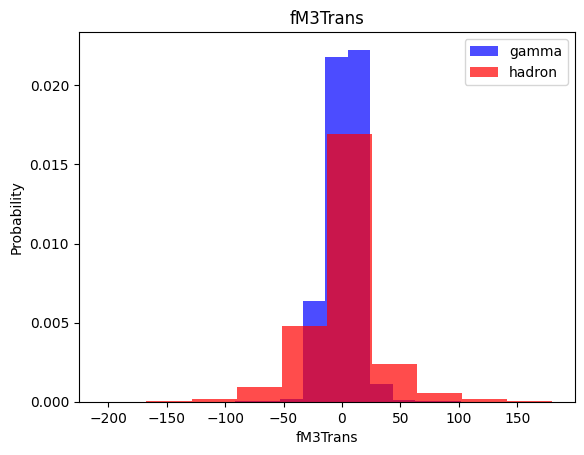

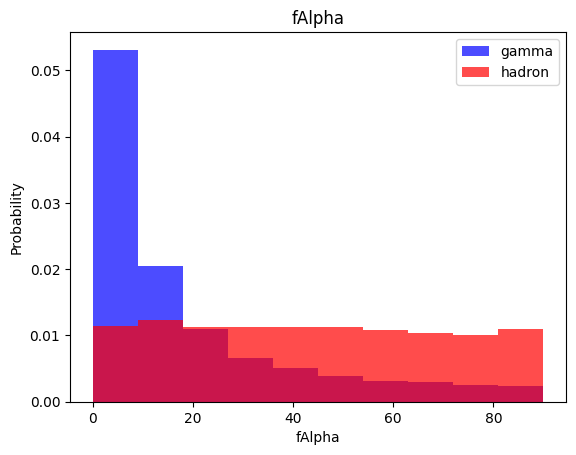

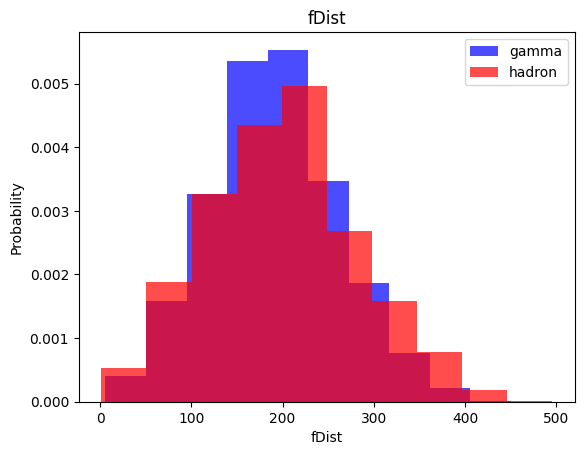

In [6]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train ,validation , test datasets

In [7]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import RandomOverSampler
def scale_dataset(dataframe,oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)#to increse the size of unset data

    data=np.hstack((X,np.reshape(y,(-1,1))))

    return data,X,y

In [9]:
train.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
991    109.5810  38.4424  3.1392  0.2823  0.1890 -95.6673 -47.4613   28.5505   
5942    70.6084  48.8302  2.9877  0.1574  0.0818 -71.5902  35.9295   24.1439   
3669    30.1747  17.1108  2.7723  0.3091  0.1748  12.8834  24.3136    1.7449   
16535   15.8646   7.6278  2.5200  0.5872  0.3069 -19.3034  14.7897  -10.1066   
17124   28.9509  15.4999  2.8228  0.3699  0.2008 -37.7378  -7.4171  -12.2385   

        fAlpha     fDist  class  
991     0.8340  244.8190      1  
5942   68.6708  181.5690      1  
3669    1.7600  150.3290      1  
16535   7.6553  188.0232      0  
17124  49.5570  218.5870      0

In [10]:
test.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
14944  19.6711   6.7556  2.6186  0.8231  0.4826  18.5214   15.3024    4.4978   
13440  68.5503  63.3599  3.6238  0.2244  0.1289  11.5003 -103.7323  -37.1604   
9926   47.8173  14.4548  2.5971  0.5006  0.2516  36.3495   15.1460  -11.3102   
11882  33.2708  27.8147  3.0894  0.2336  0.1209   4.5532  -15.6015  -26.8701   
7686   22.8063  12.7629  2.4720  0.5228  0.3052  23.6604   15.6196   -7.5697   

        fAlpha     fDist  class  
14944  21.5590  168.2400      0  
13440  64.6514  298.7289      0  
9926    2.5290  125.0280      1  
11882  43.7444  126.7270      1  
7686   41.8543  116.9640      1

In [11]:
valid

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
10135  23.3274  18.6652  2.7360  0.3949  0.2819    8.2379  15.8766  -10.4746   
6047   28.8155  22.3636  2.6314  0.2780  0.1437   25.0390  12.5494   15.5394   
15407  97.0894  31.8743  3.0044  0.2213  0.1279 -108.9723  69.2636  -28.3251   
8556   91.8755  64.5654  4.1987  0.0803  0.0429    9.8789  95.0725  -60.2146   
3146   21.1850   7.0653  2.2660  0.6883  0.3550  -24.9220  -8.7187    6.2775   
...        ...      ...     ...     ...     ...       ...      ...       ...   
583    12.6472  11.7739  2.0065  0.7094  0.3695  -15.5719   7.6167   11.0509   
1619   27.4977  18.0857  2.5623  0.3288  0.1658    0.5659 -20.8497   13.6905   
7711   26.9946  14.0507  2.5658  0.5082  0.3193  -23.7921 -24.8184   10.3340   
6099   20.9348   7.1192  2.2636  0.7084  0.3624   24.2608  10.0491    6.1052   
4213   12.6440  11.7606  2.0626  0.6926  0.3853  -15.9710   9.8408    0.0000   

        fAlpha     fDist  class  
10135  37.3197   64.5903      1  
6047   50.3060   66.8509      1  
15407  52.3764  161.3953      0  
8556   53.7900   58.0042      1  
3146   60.5880  165.1570      1  
...        ...       ...    ...  
583     5.8800  171.3000      1  
1619   76.1550   42.2426      1  
7711    5.7653  159.1670      1  
6099    0.9086  128.1680      1  
4213    7.5002  114.9160      1  

[3804 rows x 11 columns]

In [12]:
print(len(train[train['class']==1]))#gamma
print(len(train[train['class']==0]))

7351
4061


In [13]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

In [14]:
len(y_train)

14702

In [15]:
sum(y_train==1)

7351

In [16]:
sum(y_train==0)

7351

In [17]:
# kNN (K- Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
y_pred=knn_model.predict(X_test)

In [20]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [21]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.74      1286
           1       0.88      0.84      0.86      2518

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1286
           1       0.75      0.90      0.82      2518

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Log Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1286
           1       0.85      0.81      0.83      2518

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [33]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1286
           1       0.90      0.89      0.89      2518

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Classification Neural Networks

In [32]:
import tensorflow as tf 

In [38]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history=nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0)

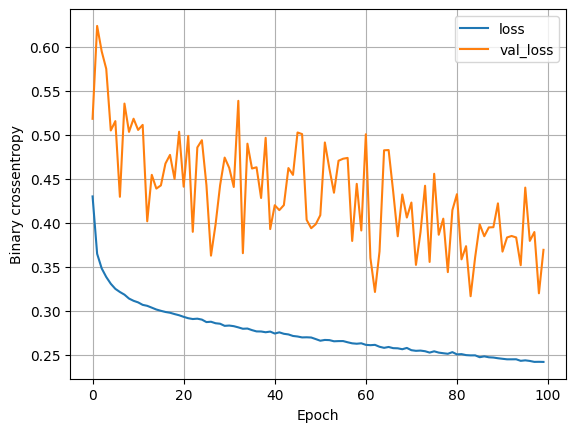

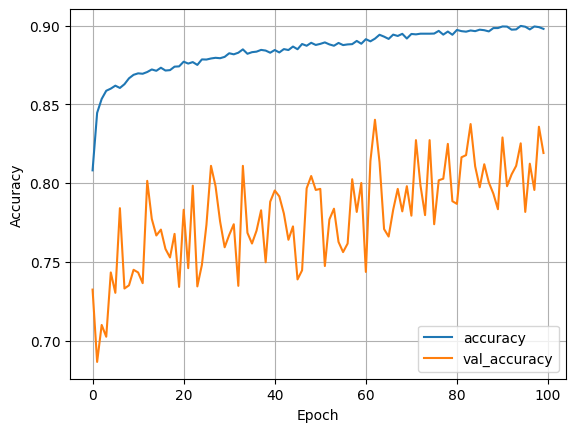

In [44]:
plot_loss(history)
plot_accuracy(history)

In [47]:

def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
 nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
 ])

 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])

 history=nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

 return nn_model,history

def plot_history(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

16 nodes,dropout 0,lr 0.1,batch_size 32


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


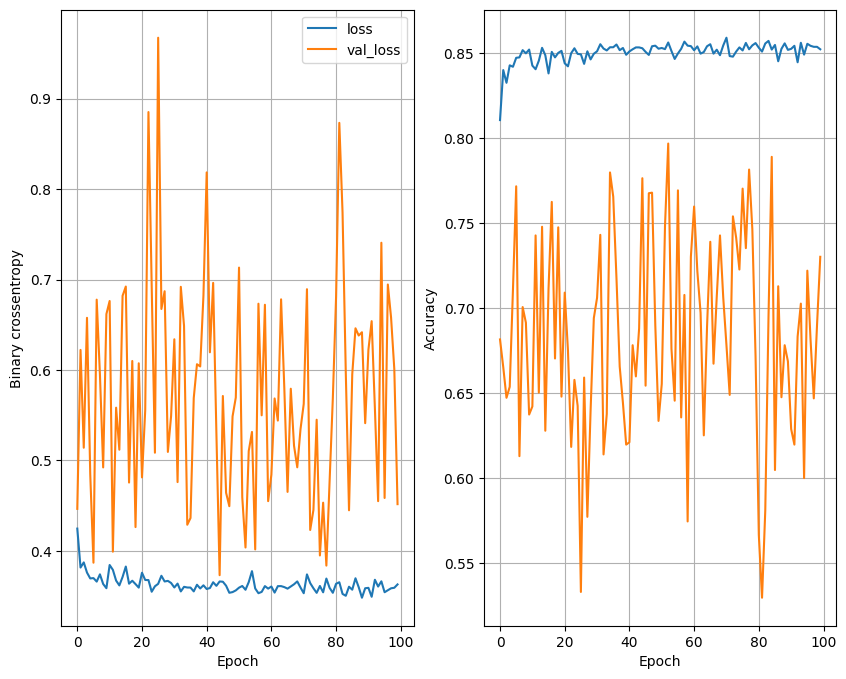

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8662 - loss: 0.3411
16 nodes,dropout 0,lr 0.1,batch_size 64


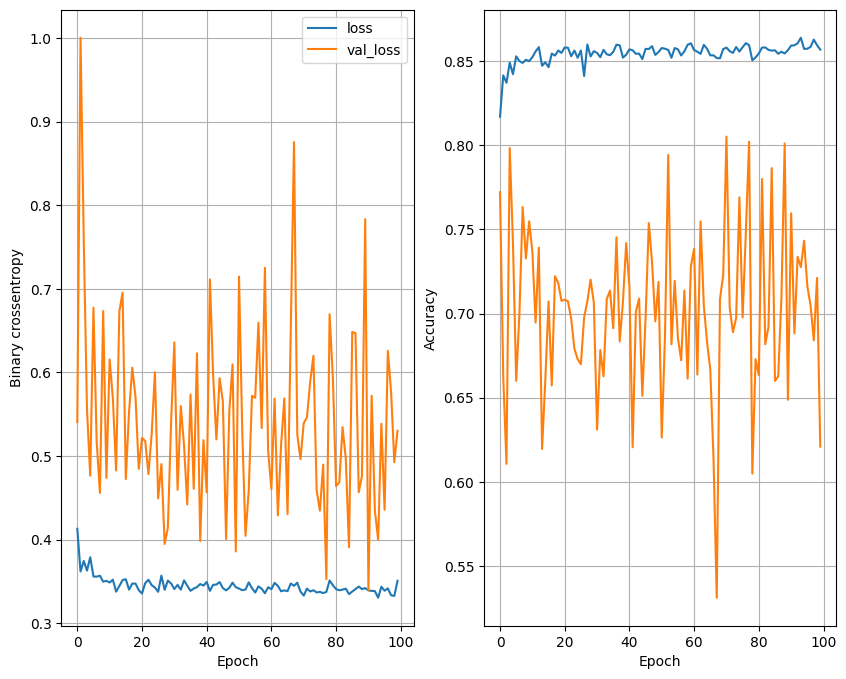

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.3812  
16 nodes,dropout 0,lr 0.1,batch_size 128


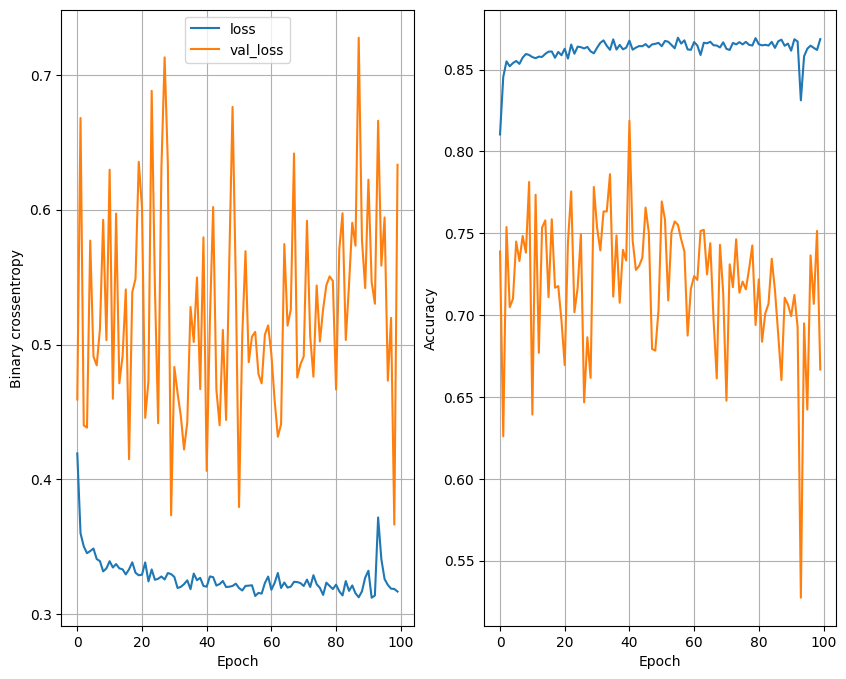

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8564 - loss: 0.3386
16 nodes,dropout 0,lr 0.005,batch_size 32


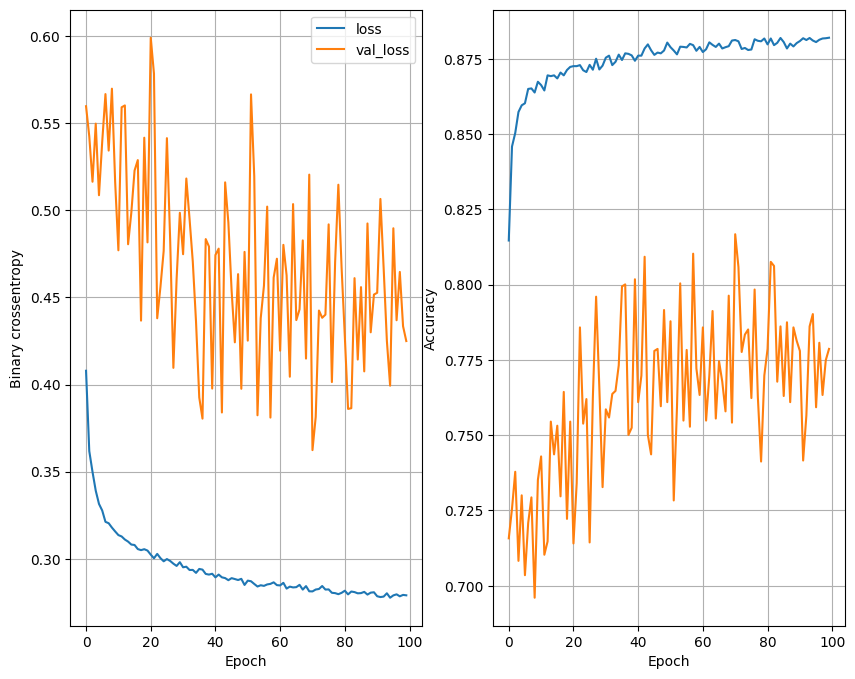

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8594 - loss: 0.3287
16 nodes,dropout 0,lr 0.005,batch_size 64


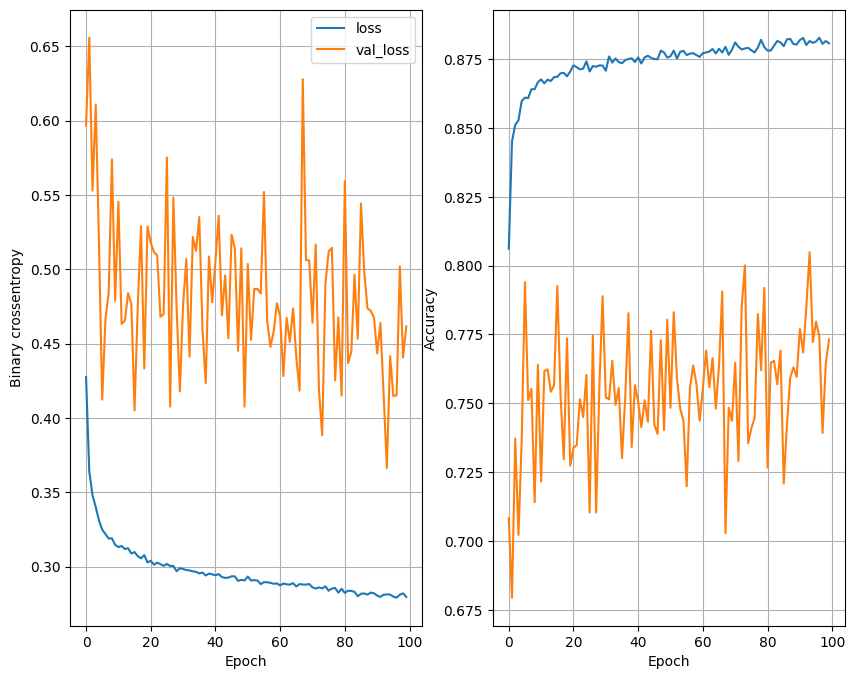

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8682 - loss: 0.3214
16 nodes,dropout 0,lr 0.005,batch_size 128


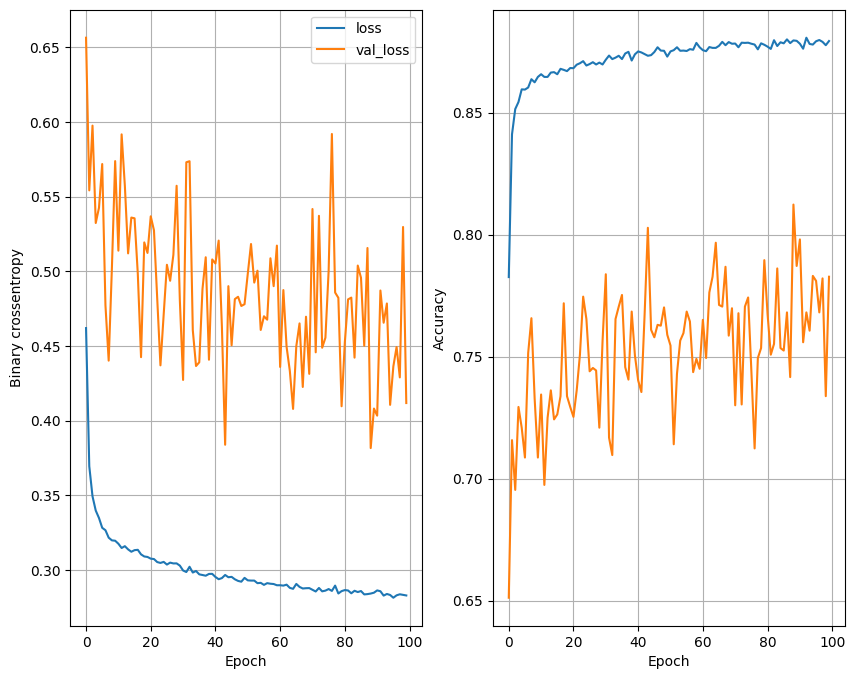

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8697 - loss: 0.3192
16 nodes,dropout 0,lr 0.001,batch_size 32


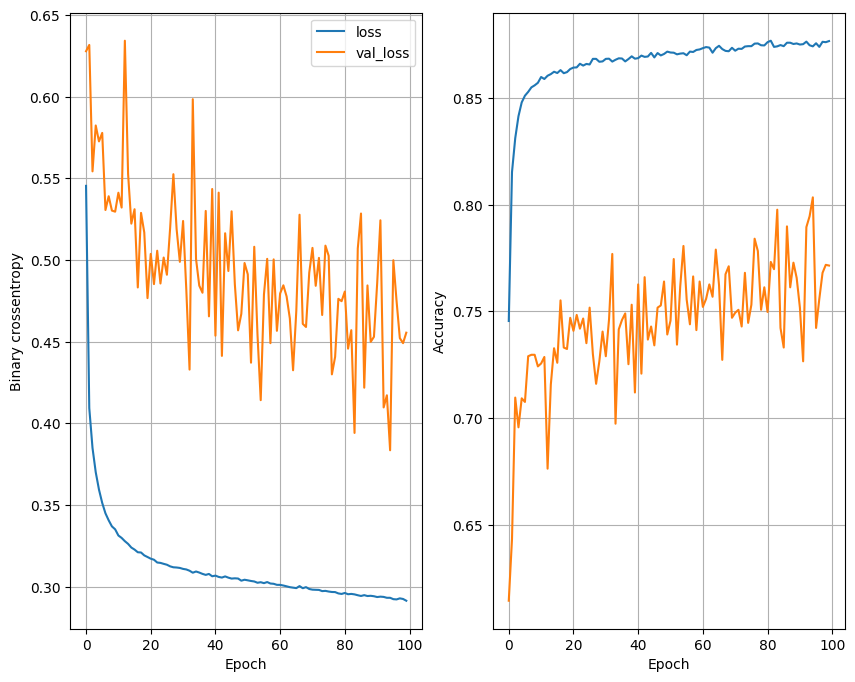

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8664 - loss: 0.3191
16 nodes,dropout 0,lr 0.001,batch_size 64


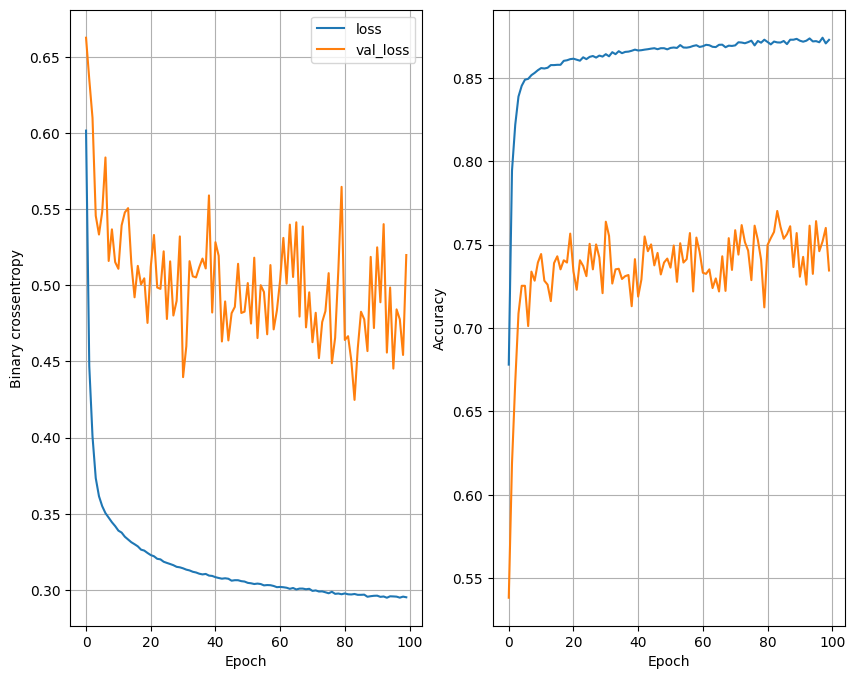

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8721 - loss: 0.3180
16 nodes,dropout 0,lr 0.001,batch_size 128


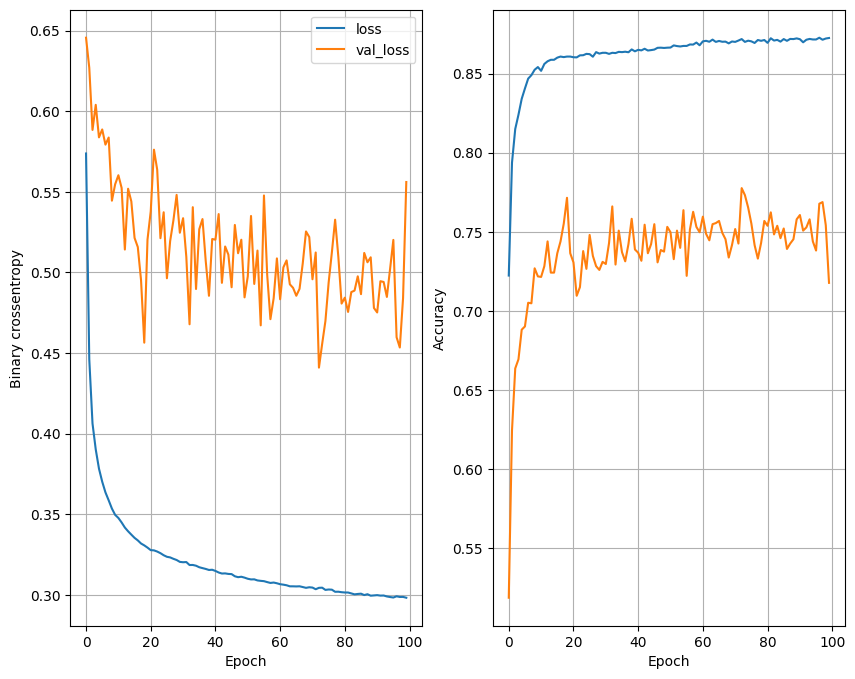

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8674 - loss: 0.3176
16 nodes,dropout 0.2,lr 0.1,batch_size 32


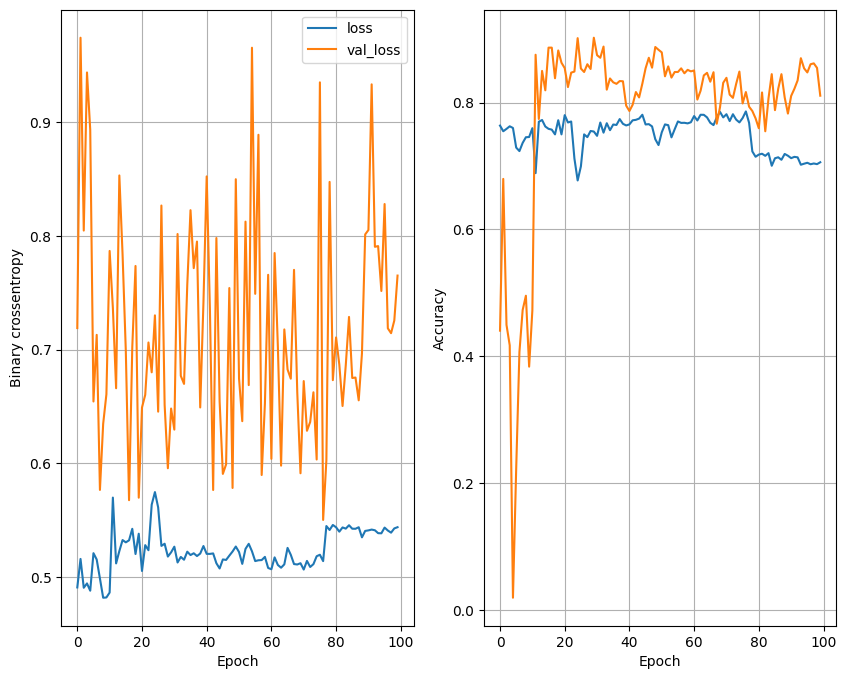

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7988 - loss: 0.4678
16 nodes,dropout 0.2,lr 0.1,batch_size 64


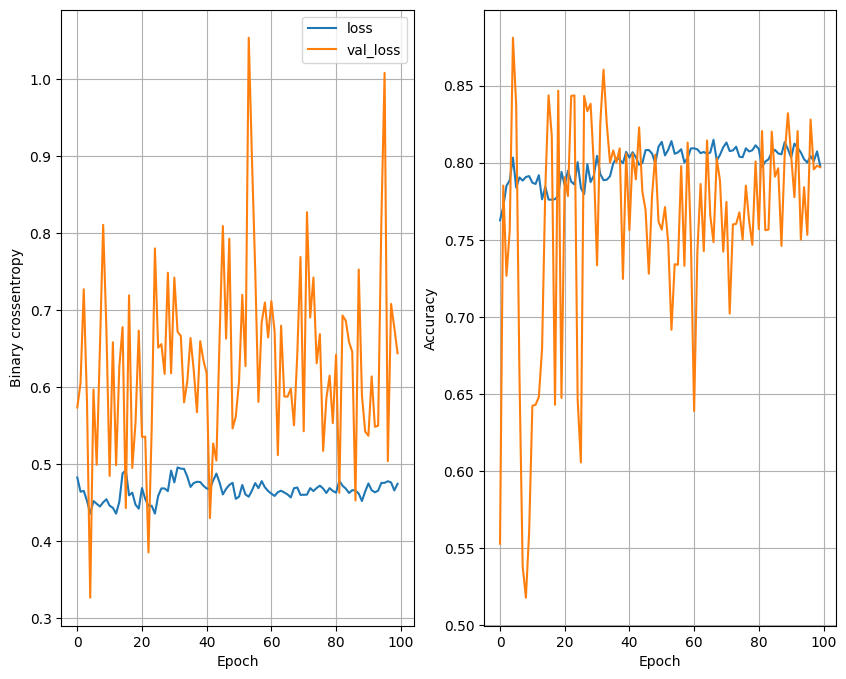

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8209 - loss: 0.4214
16 nodes,dropout 0.2,lr 0.1,batch_size 128


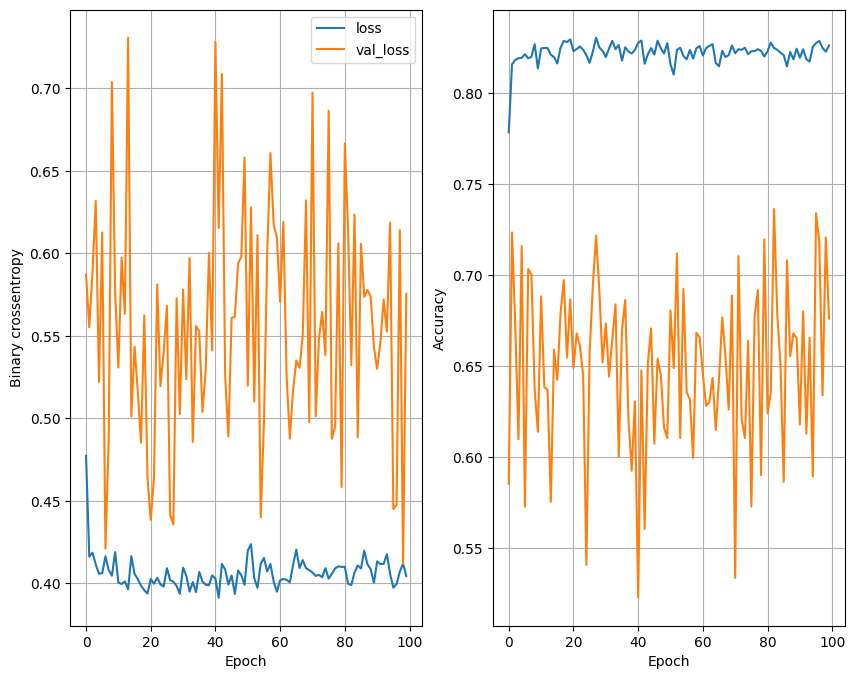

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8547 - loss: 0.3452
16 nodes,dropout 0.2,lr 0.005,batch_size 32


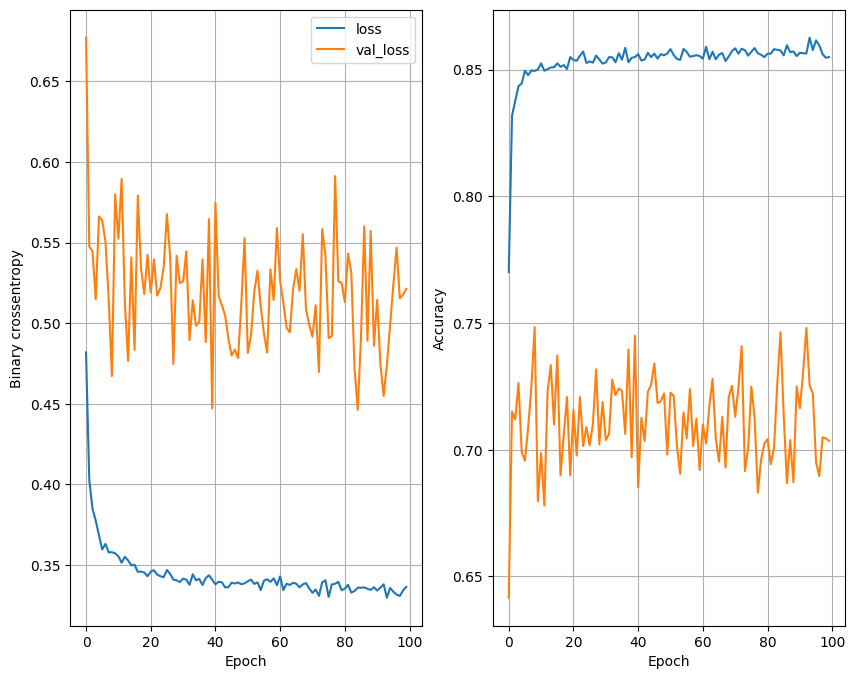

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3183
16 nodes,dropout 0.2,lr 0.005,batch_size 64


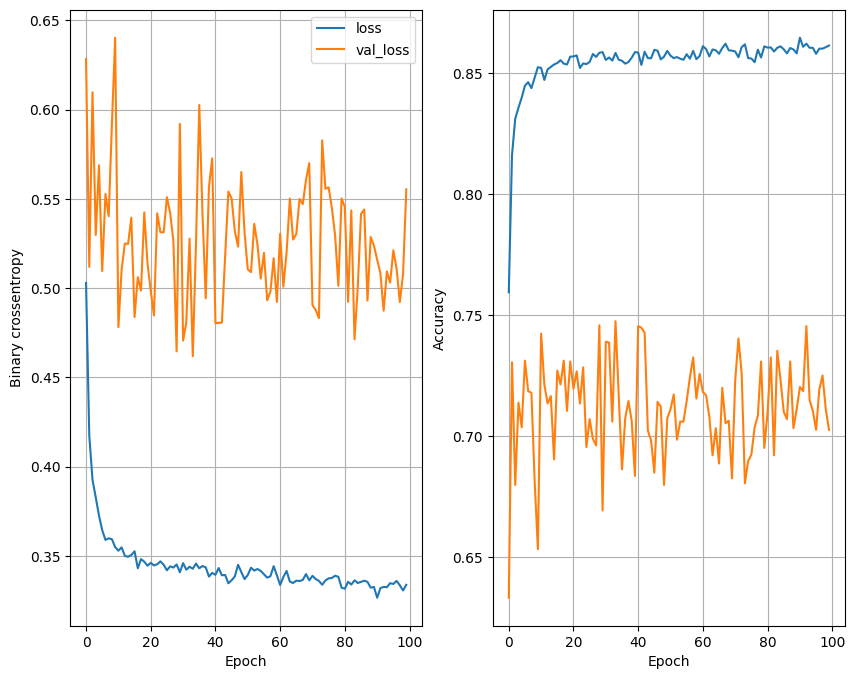

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8634 - loss: 0.3187
16 nodes,dropout 0.2,lr 0.005,batch_size 128


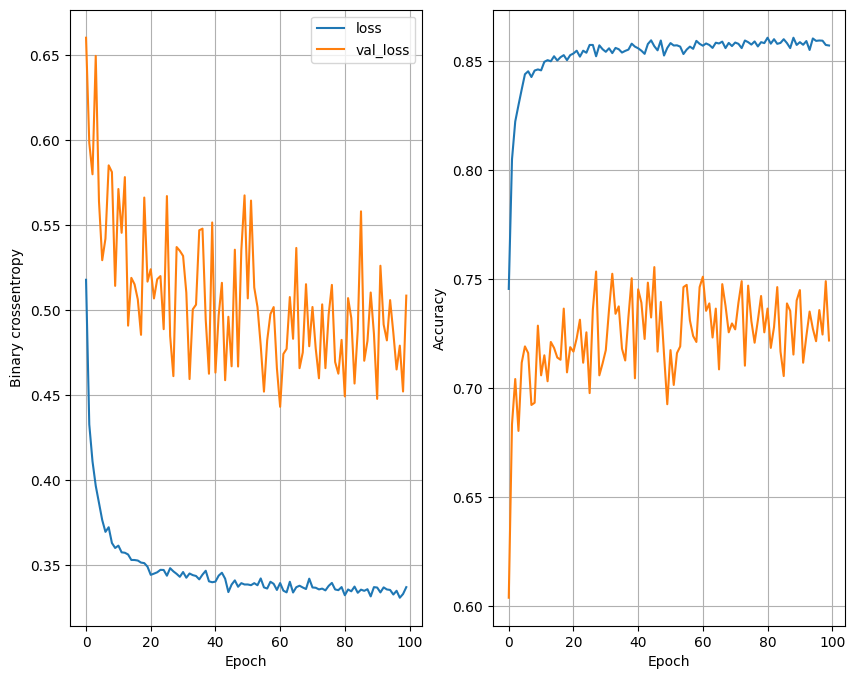

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8720 - loss: 0.3147
16 nodes,dropout 0.2,lr 0.001,batch_size 32


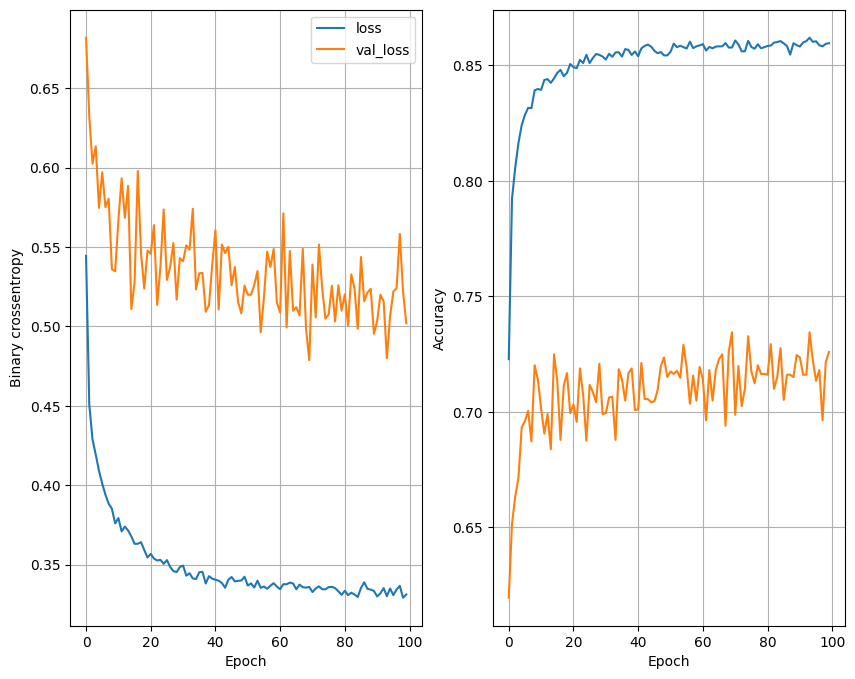

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8707 - loss: 0.3168
16 nodes,dropout 0.2,lr 0.001,batch_size 64


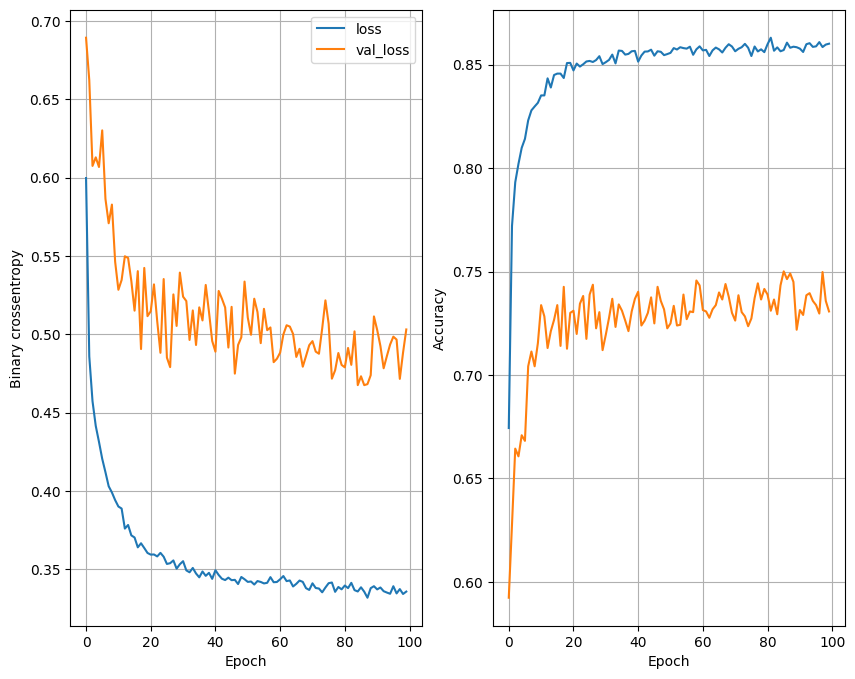

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8694 - loss: 0.3151
16 nodes,dropout 0.2,lr 0.001,batch_size 128


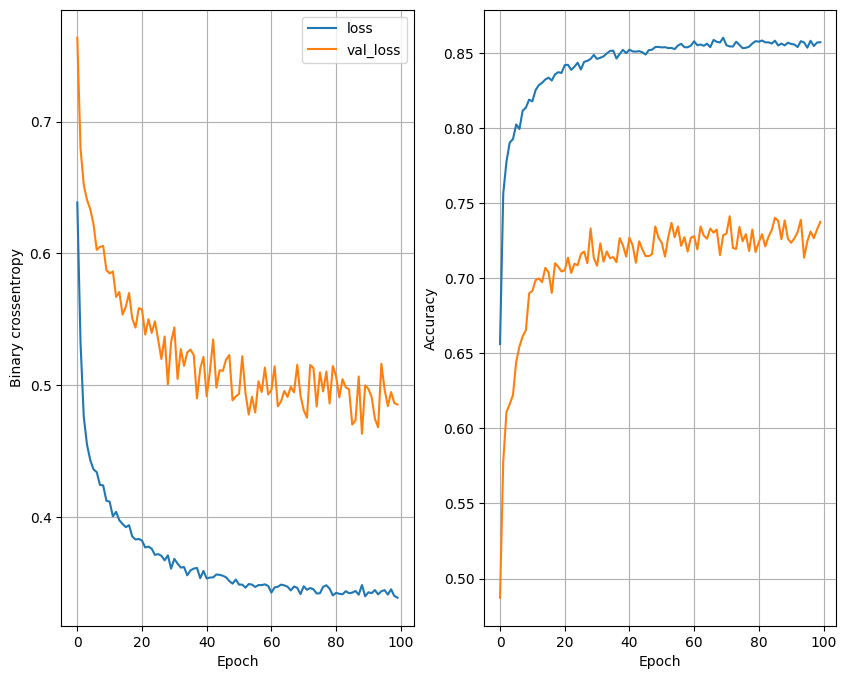

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3211
32 nodes,dropout 0,lr 0.1,batch_size 32


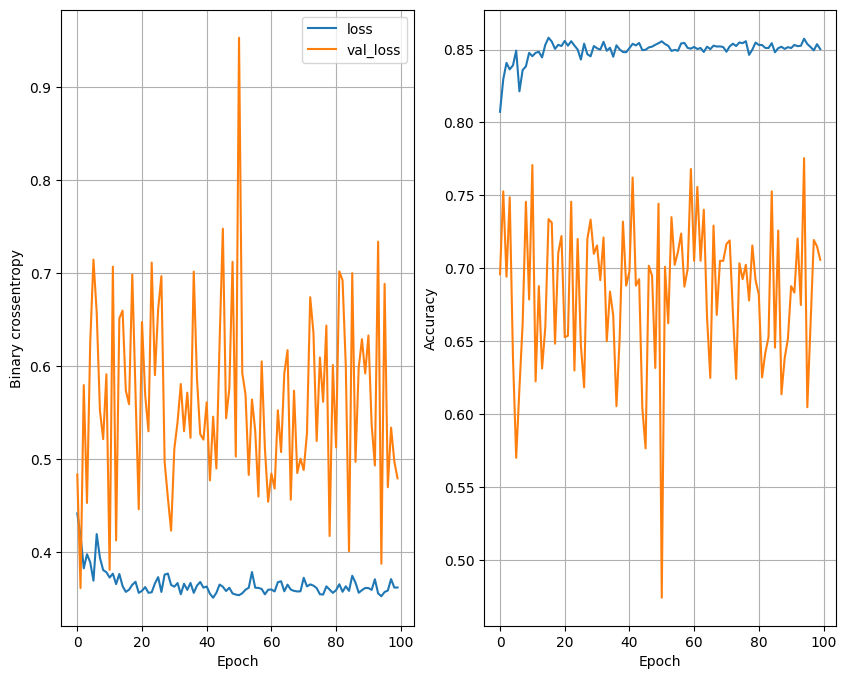

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3532
32 nodes,dropout 0,lr 0.1,batch_size 64


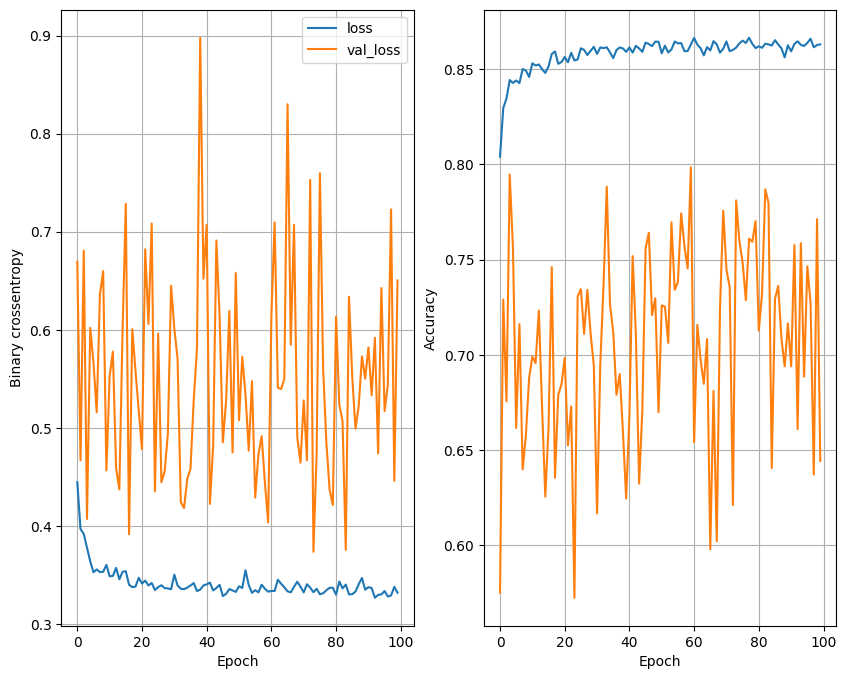

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8569 - loss: 0.3419
32 nodes,dropout 0,lr 0.1,batch_size 128


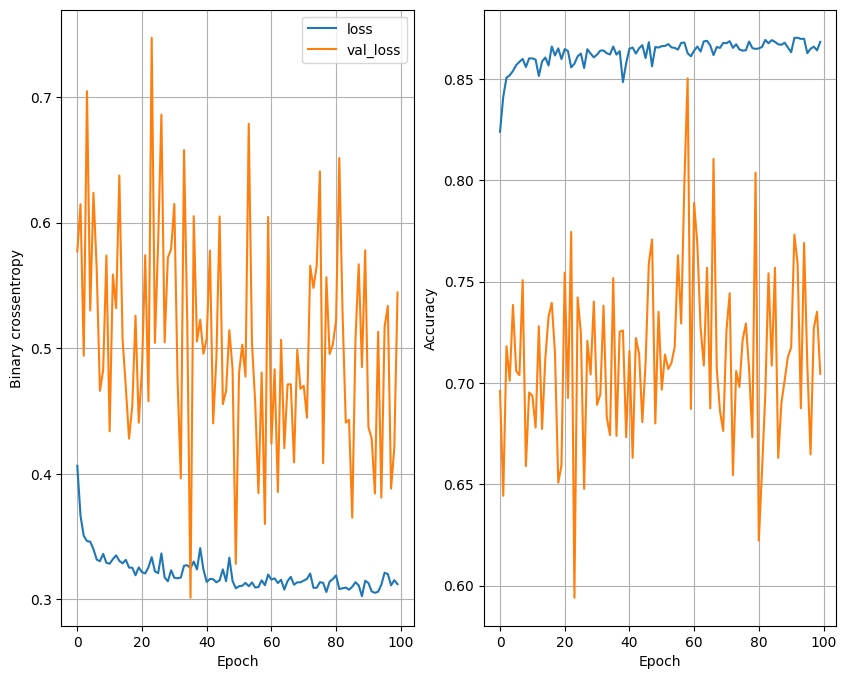

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.3256
32 nodes,dropout 0,lr 0.005,batch_size 32


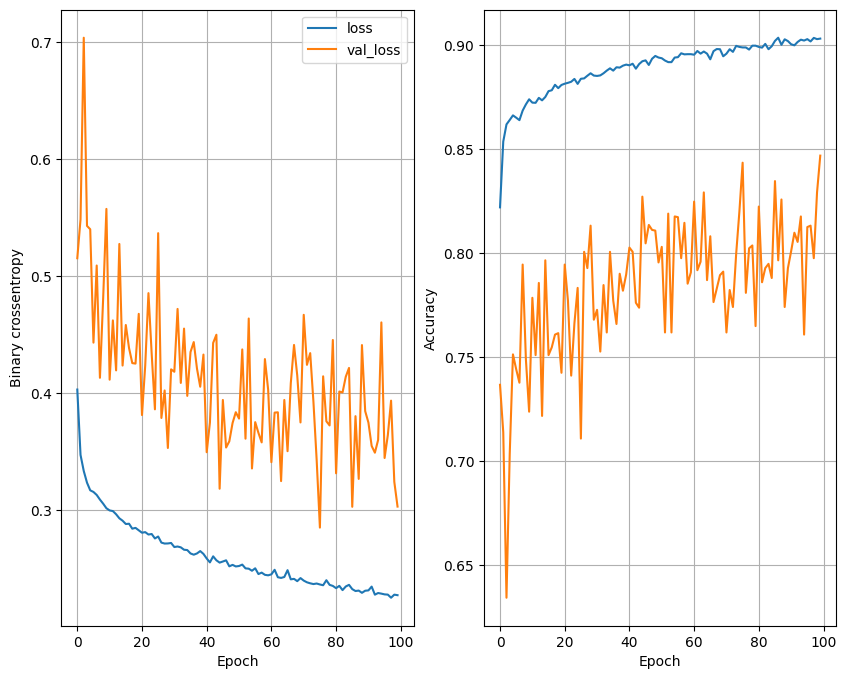

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8579 - loss: 0.3682
32 nodes,dropout 0,lr 0.005,batch_size 64


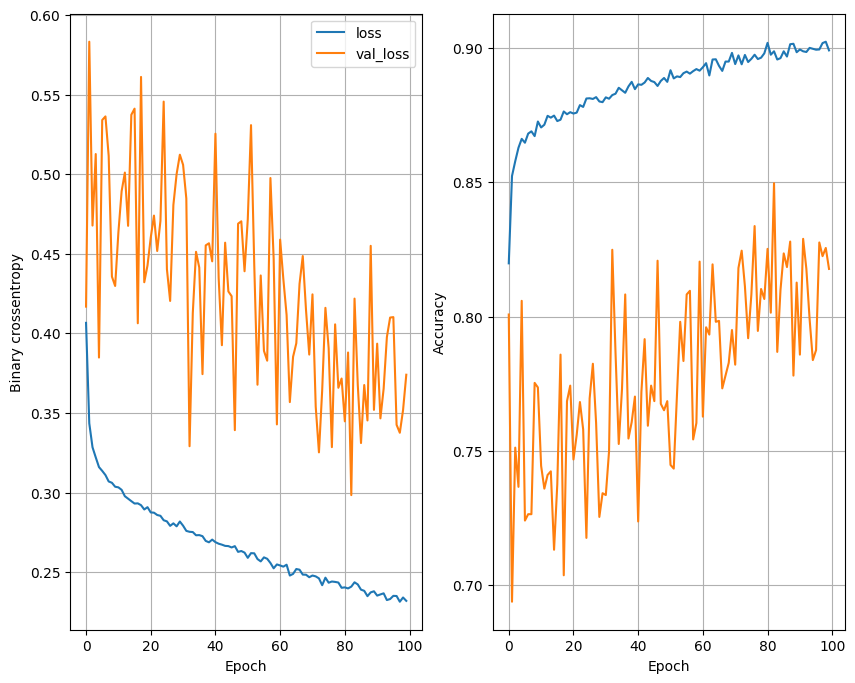

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8772 - loss: 0.3737
32 nodes,dropout 0,lr 0.005,batch_size 128


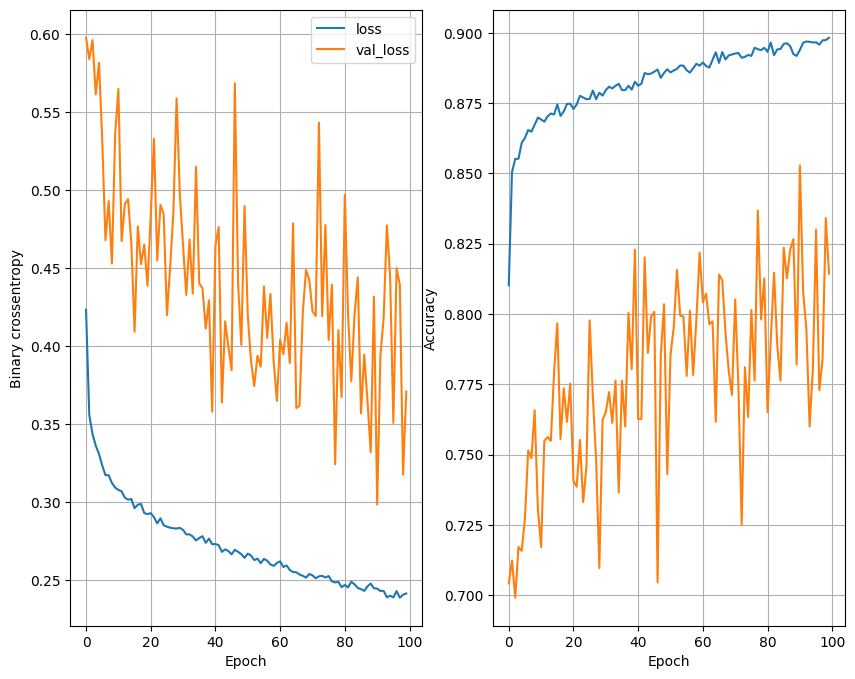

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8625 - loss: 0.3395
32 nodes,dropout 0,lr 0.001,batch_size 32


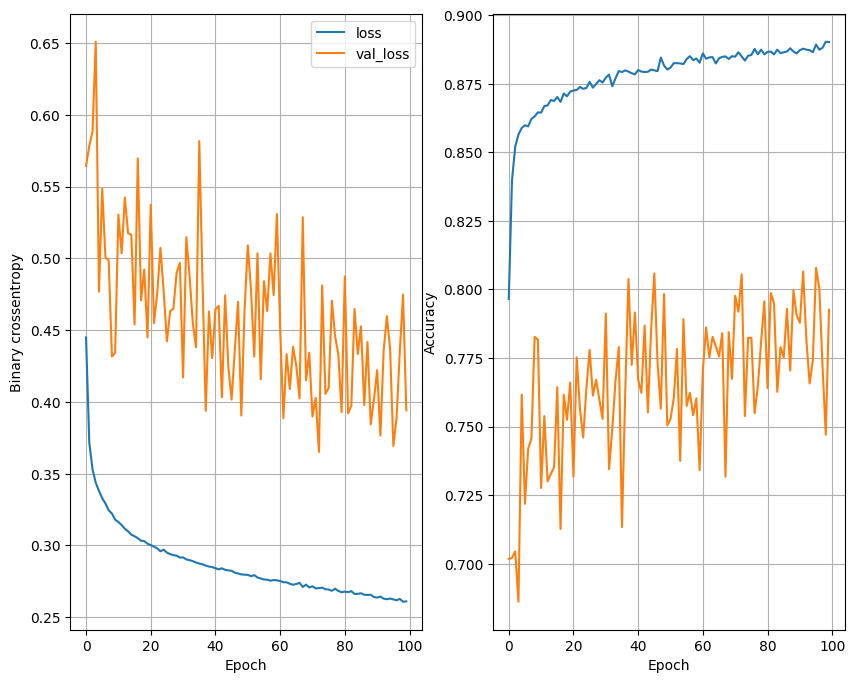

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8737 - loss: 0.3156
32 nodes,dropout 0,lr 0.001,batch_size 64


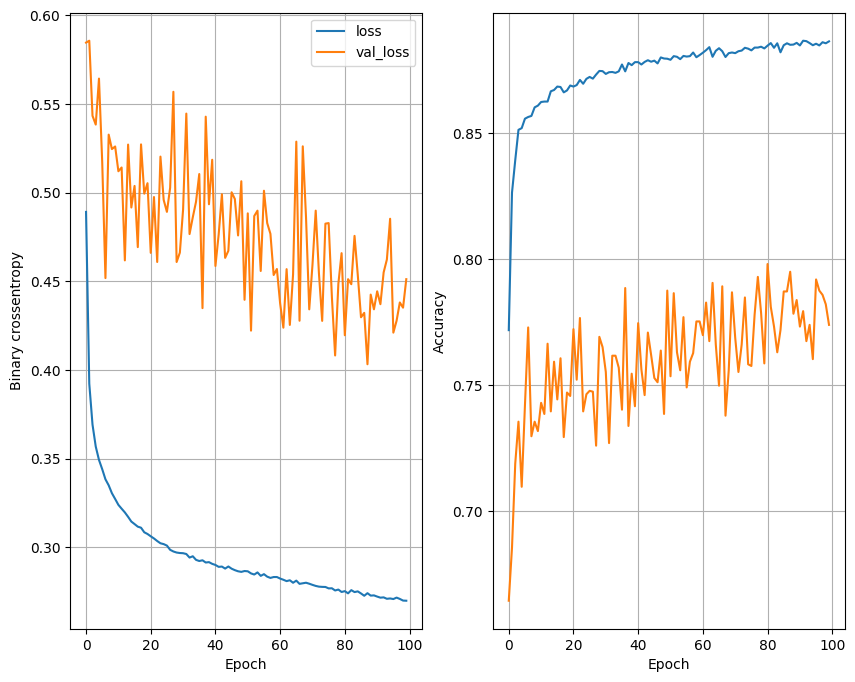

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8706 - loss: 0.3246
32 nodes,dropout 0,lr 0.001,batch_size 128


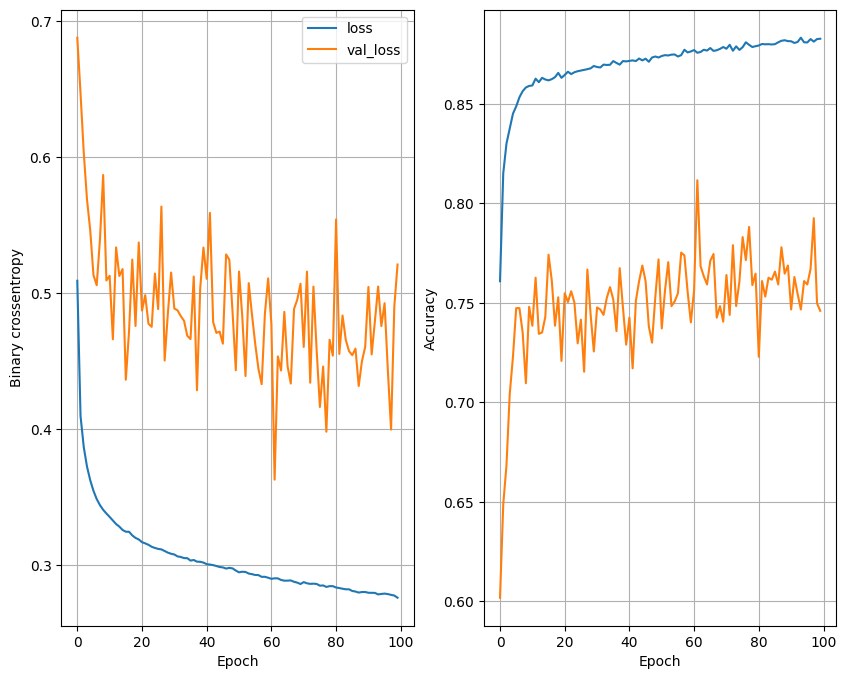

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3190
32 nodes,dropout 0.2,lr 0.1,batch_size 32


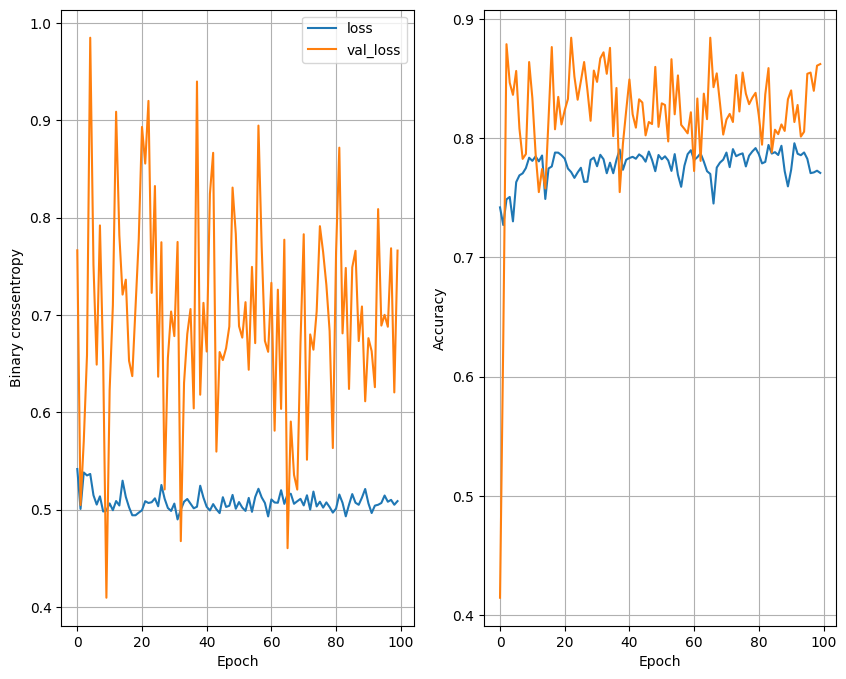

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.7680 - loss: 0.4701
32 nodes,dropout 0.2,lr 0.1,batch_size 64


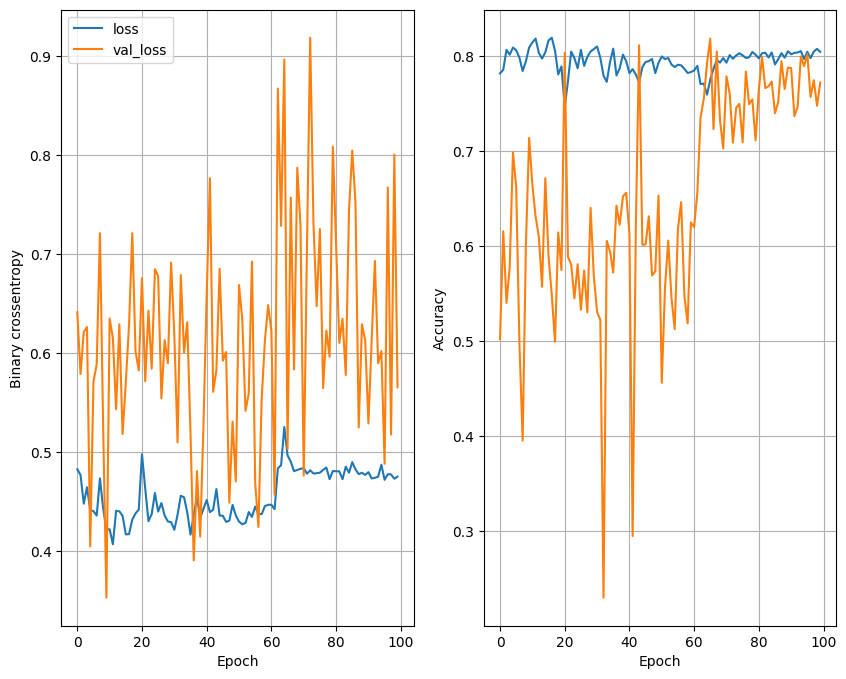

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 0.4219
32 nodes,dropout 0.2,lr 0.1,batch_size 128


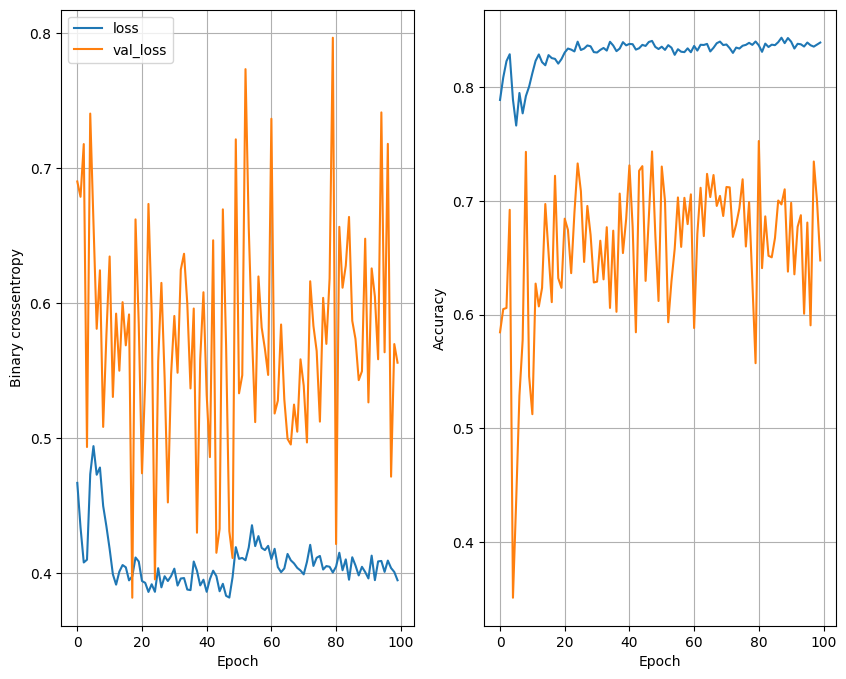

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8592 - loss: 0.3703
32 nodes,dropout 0.2,lr 0.005,batch_size 32


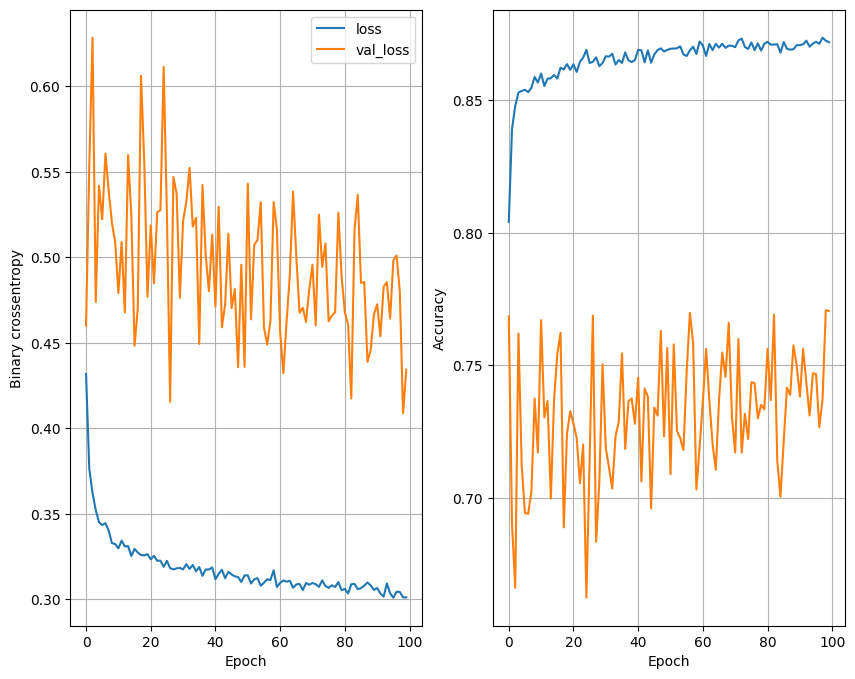

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8753 - loss: 0.3055
32 nodes,dropout 0.2,lr 0.005,batch_size 64


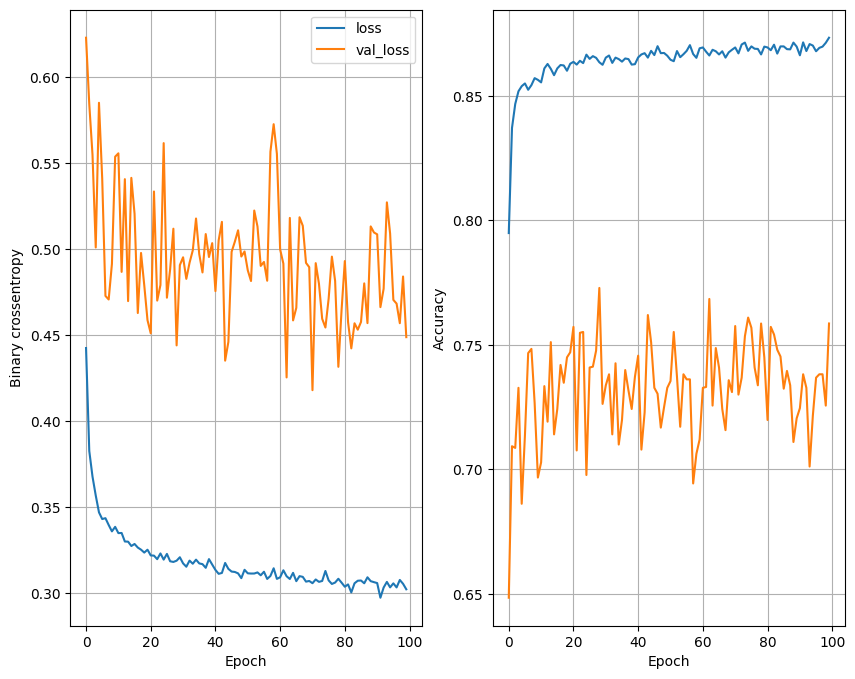

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8790 - loss: 0.3017
32 nodes,dropout 0.2,lr 0.005,batch_size 128


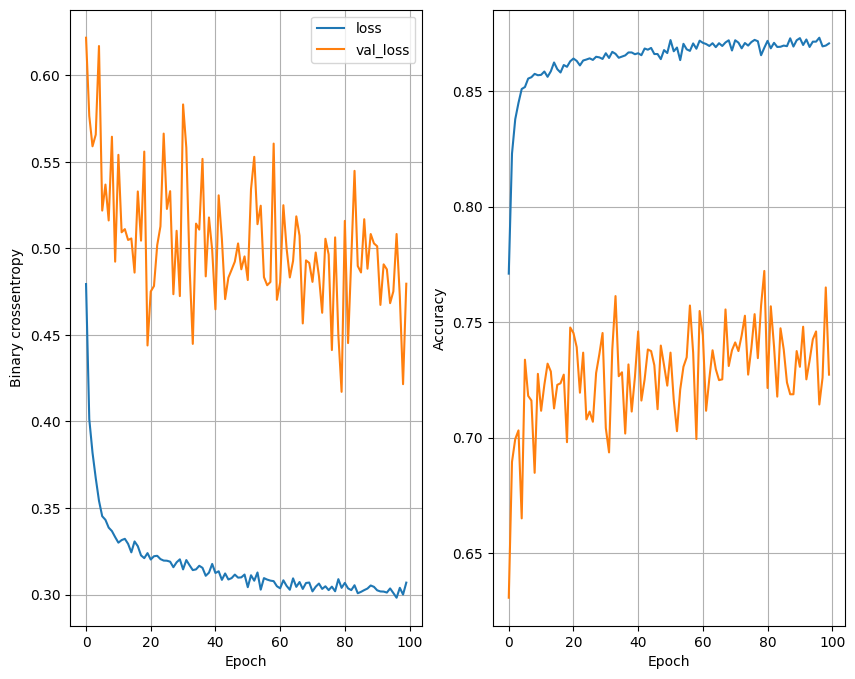

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.3040
32 nodes,dropout 0.2,lr 0.001,batch_size 32


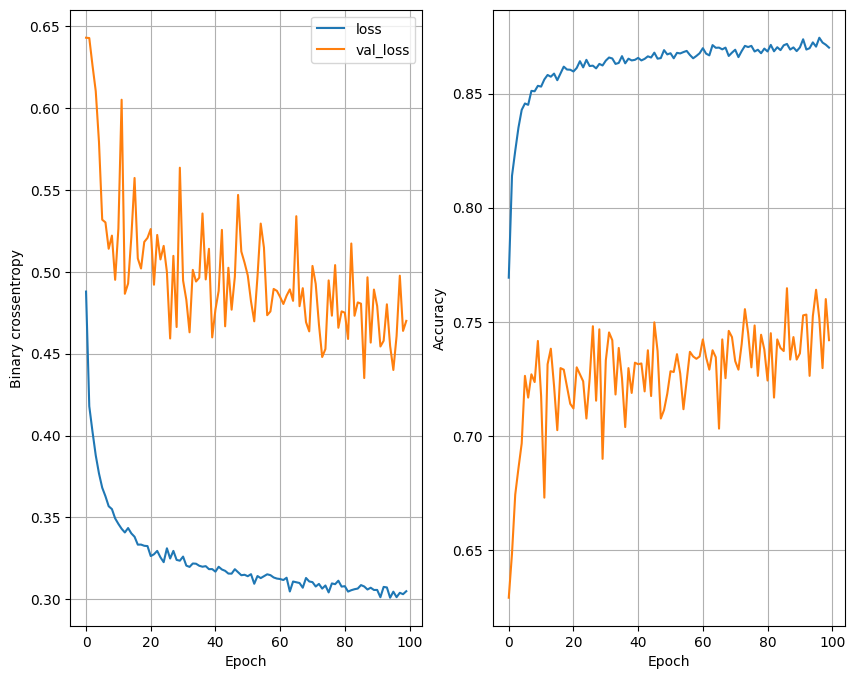

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8758 - loss: 0.3067
32 nodes,dropout 0.2,lr 0.001,batch_size 64


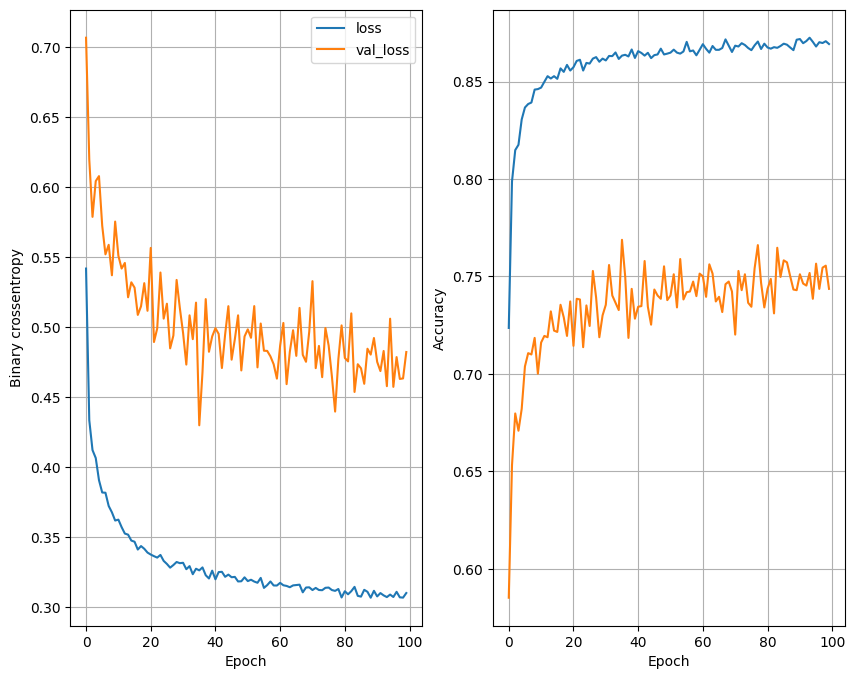

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8782 - loss: 0.3049
32 nodes,dropout 0.2,lr 0.001,batch_size 128


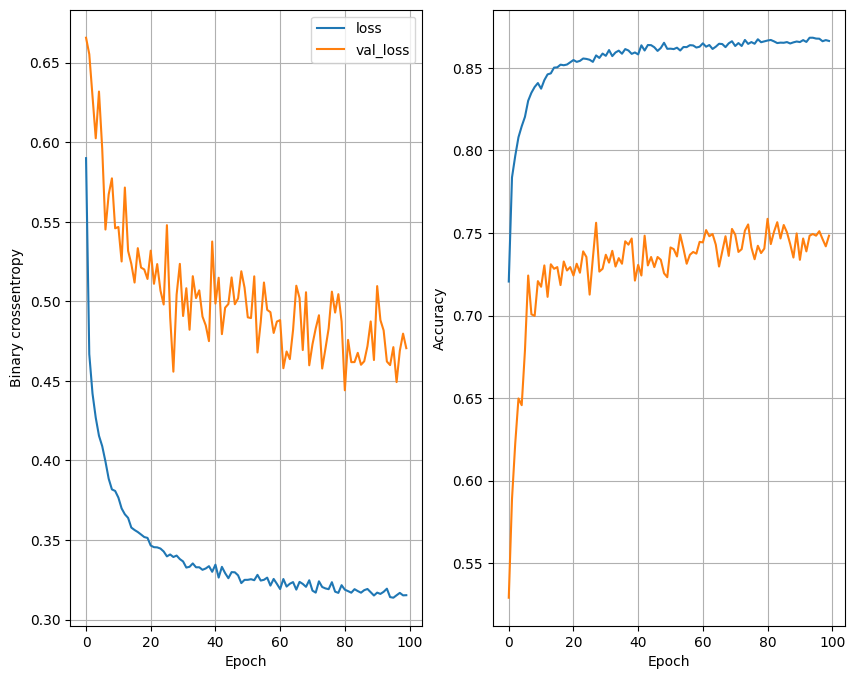

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8753 - loss: 0.3096
64 nodes,dropout 0,lr 0.1,batch_size 32


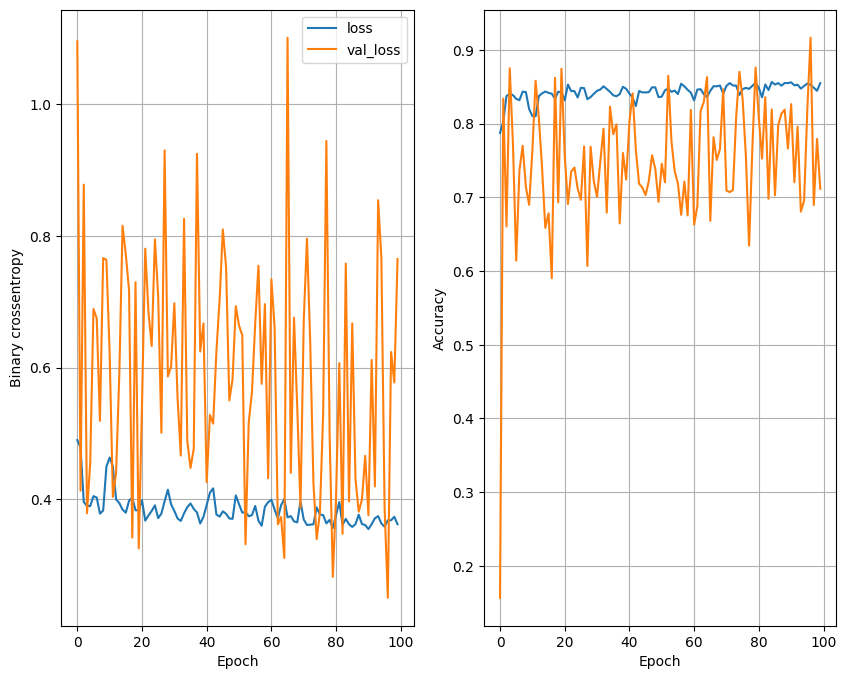

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8567 - loss: 0.3841
64 nodes,dropout 0,lr 0.1,batch_size 64


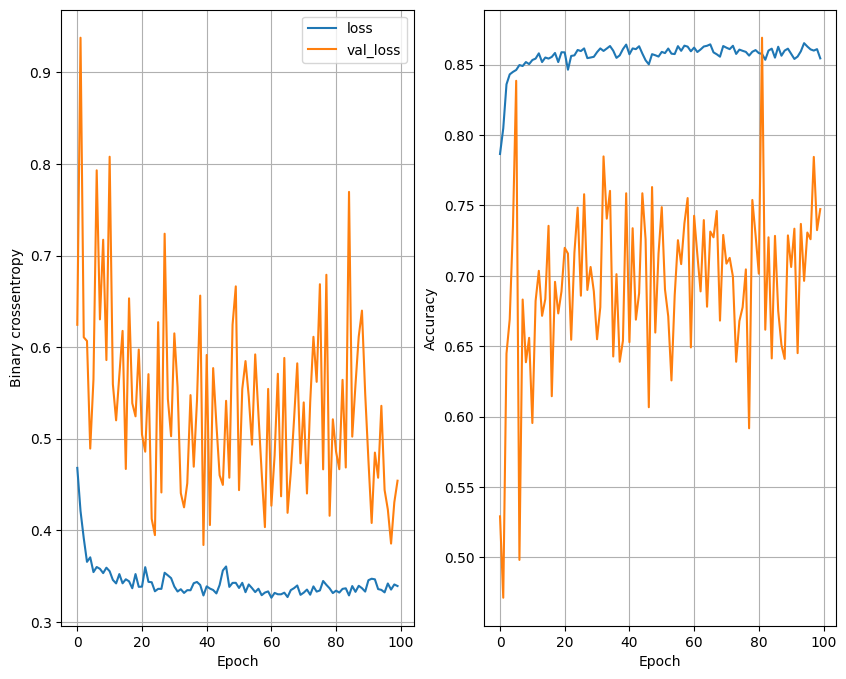

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8564 - loss: 0.3687
64 nodes,dropout 0,lr 0.1,batch_size 128


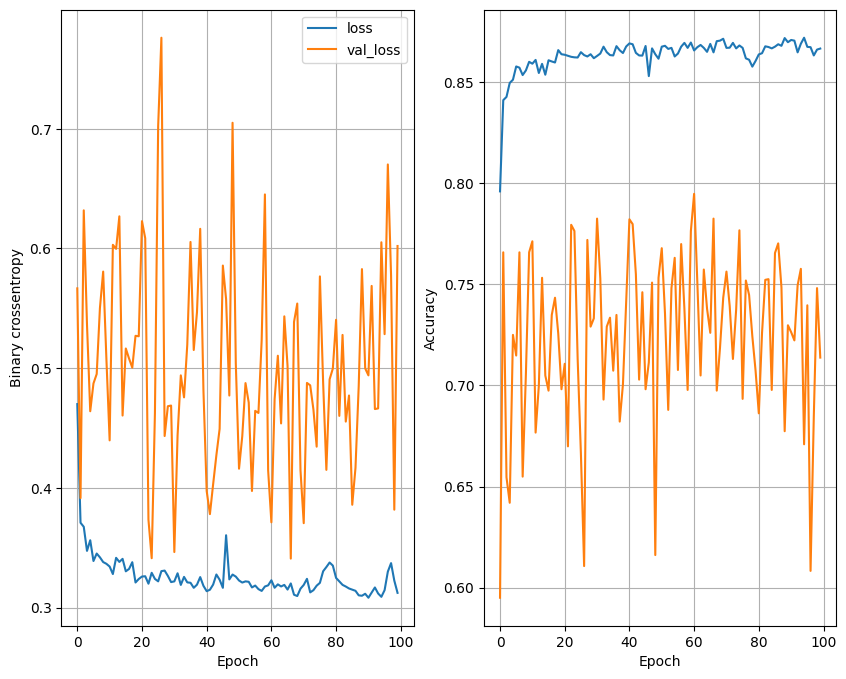

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8687 - loss: 0.3266
64 nodes,dropout 0,lr 0.005,batch_size 32


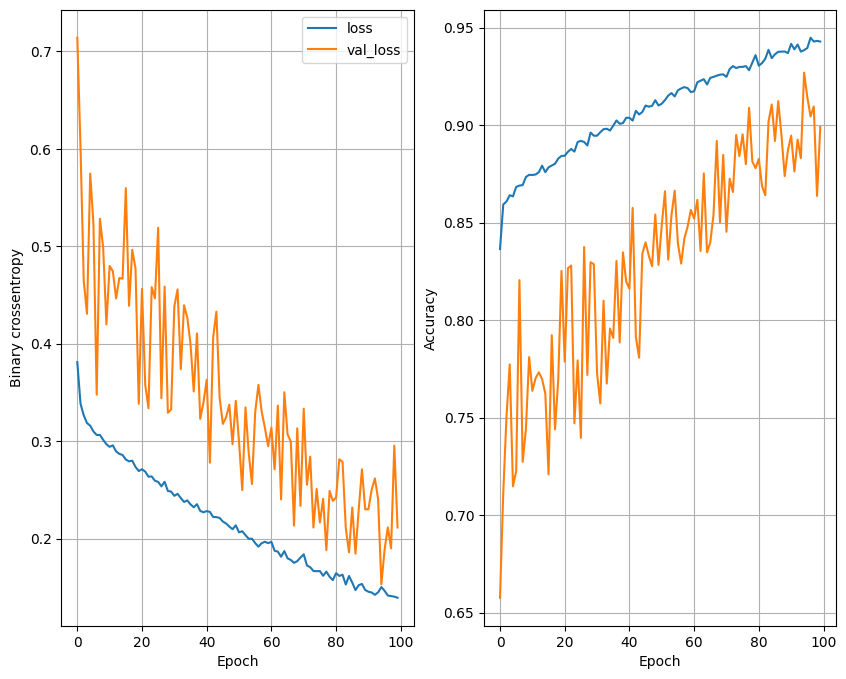

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8588 - loss: 0.6226
64 nodes,dropout 0,lr 0.005,batch_size 64


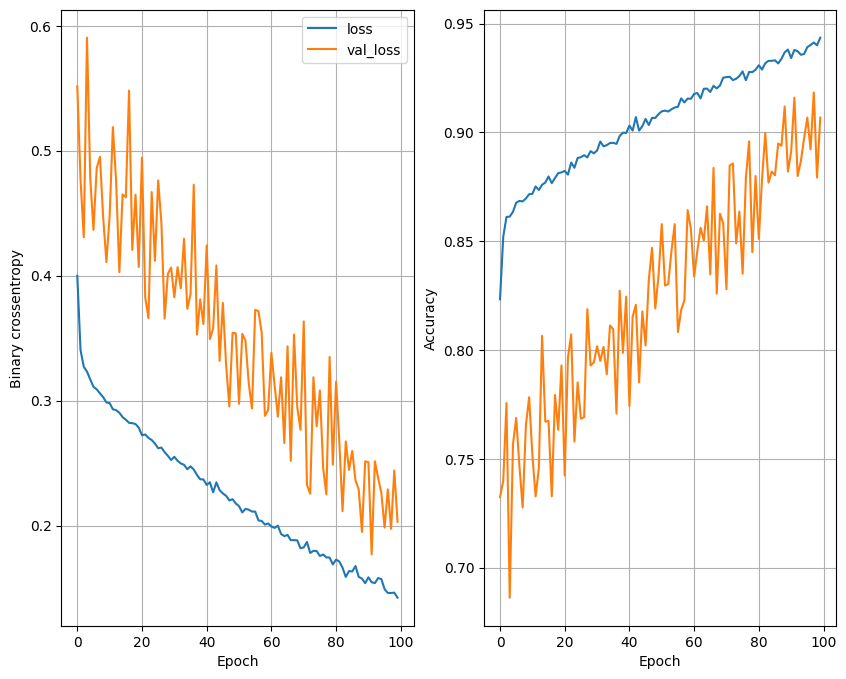

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8481 - loss: 0.5456
64 nodes,dropout 0,lr 0.005,batch_size 128


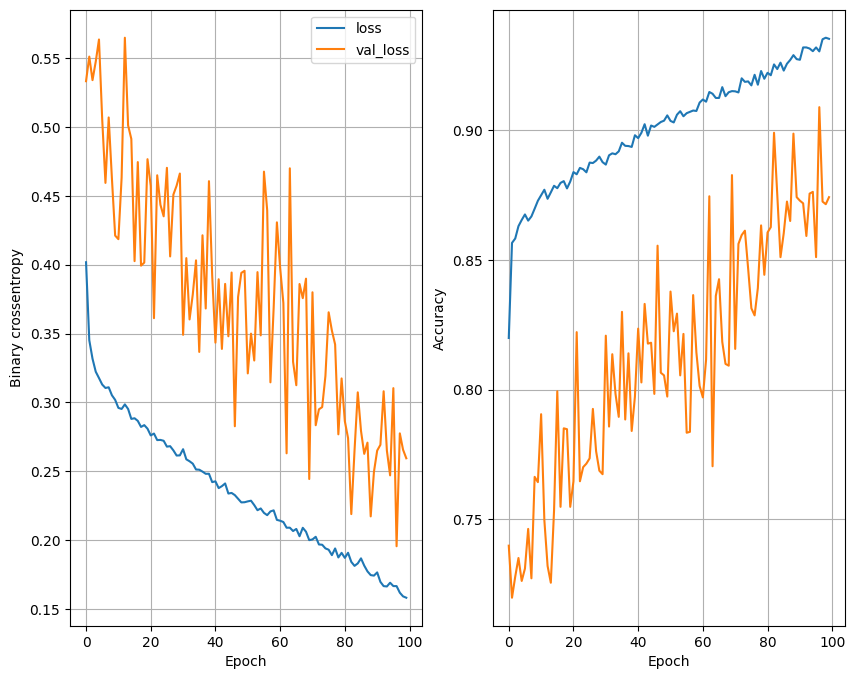

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.4655
64 nodes,dropout 0,lr 0.001,batch_size 32


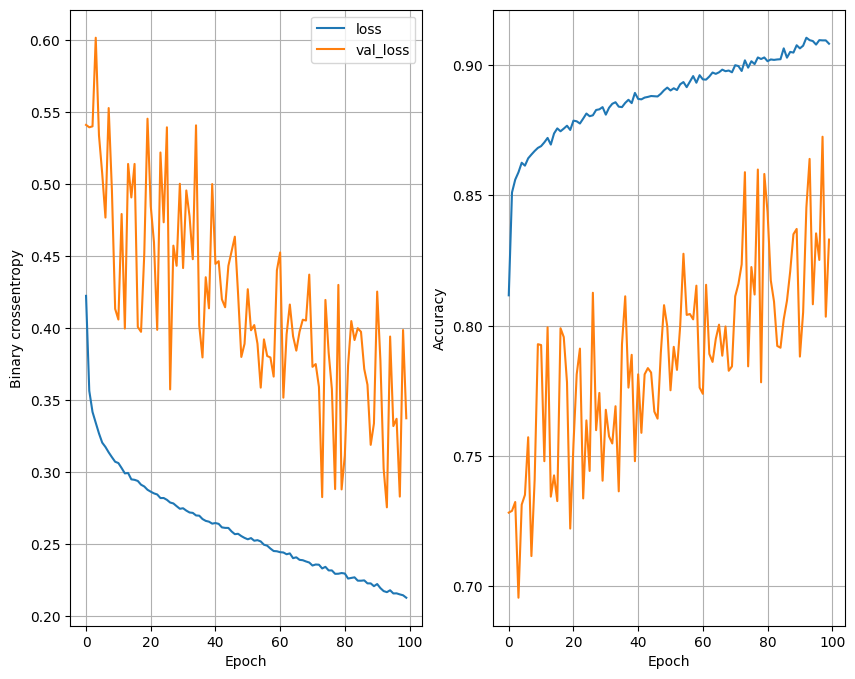

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8695 - loss: 0.3447
64 nodes,dropout 0,lr 0.001,batch_size 64


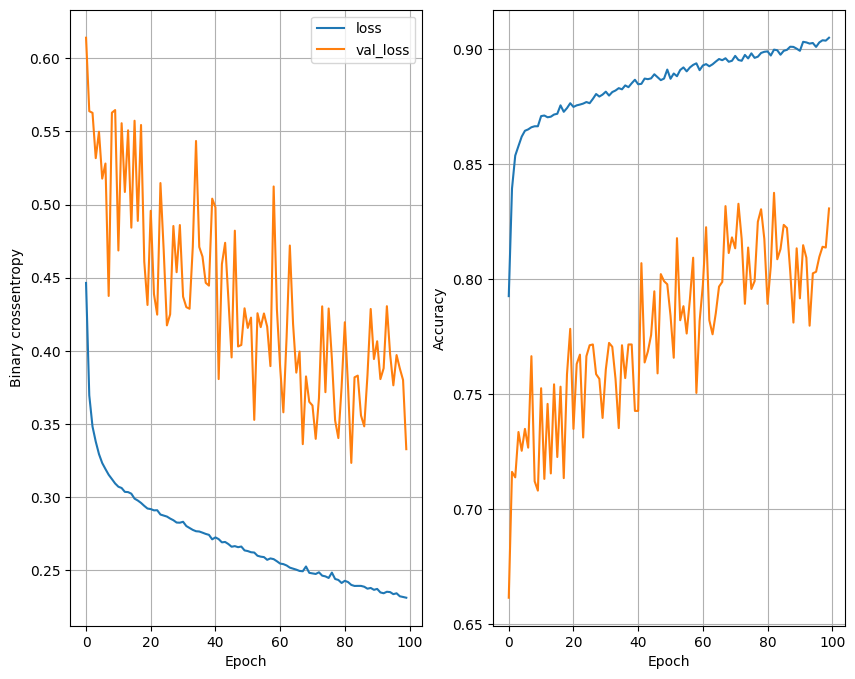

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8667 - loss: 0.3236
64 nodes,dropout 0,lr 0.001,batch_size 128


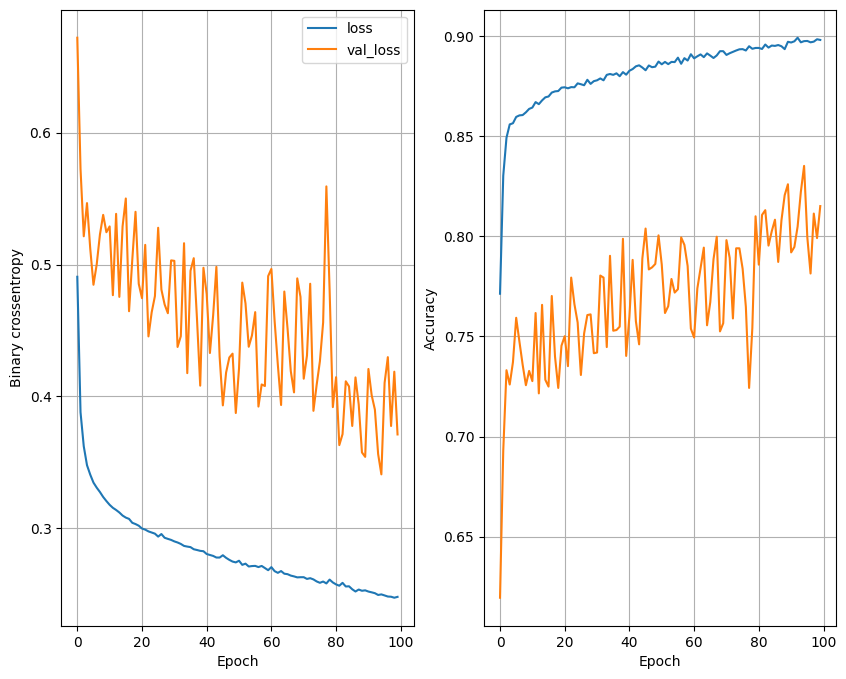

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8712 - loss: 0.3206
64 nodes,dropout 0.2,lr 0.1,batch_size 32


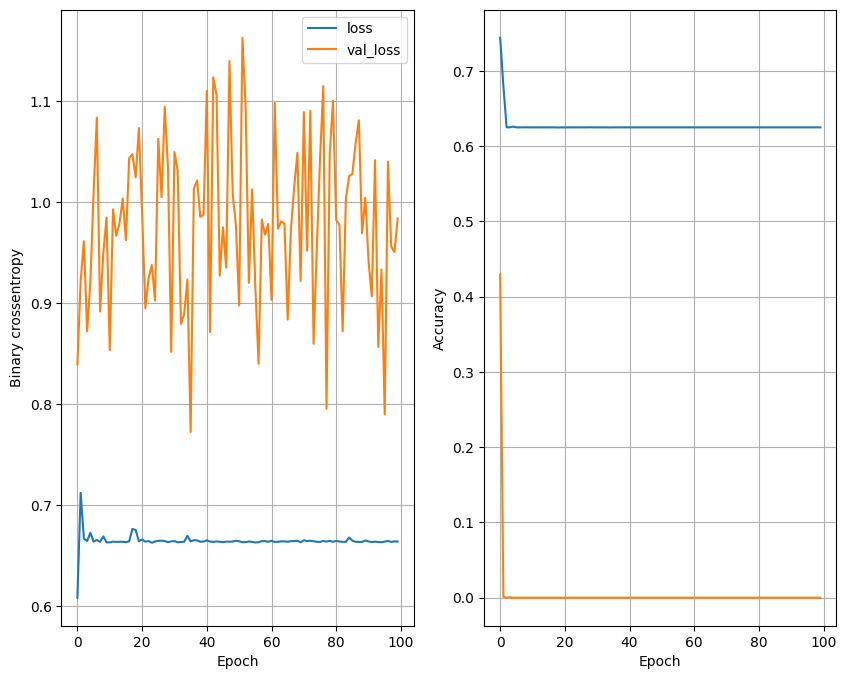

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.6566 - loss: 0.6452
64 nodes,dropout 0.2,lr 0.1,batch_size 64


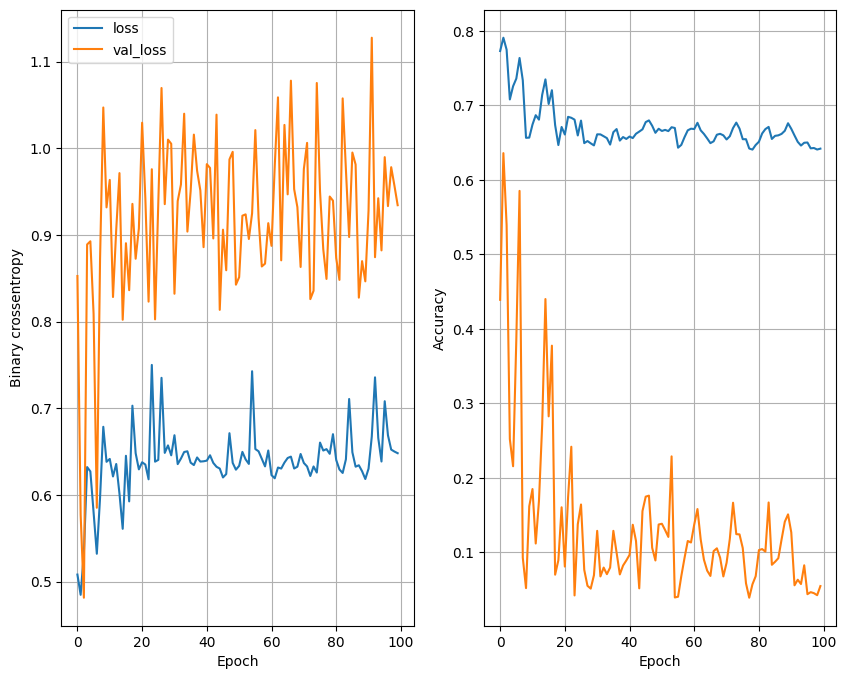

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6701 - loss: 0.6334
64 nodes,dropout 0.2,lr 0.1,batch_size 128


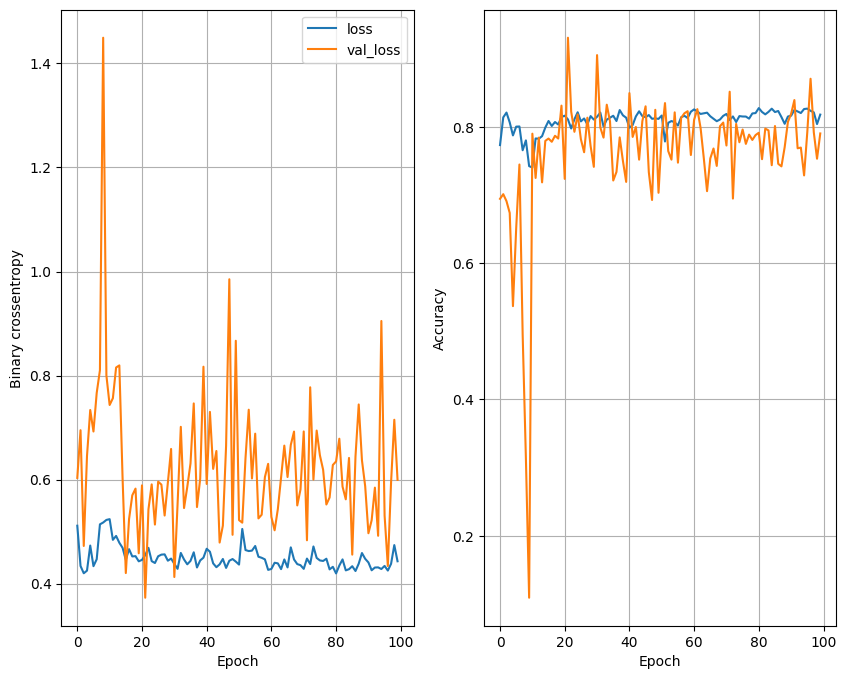

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8449 - loss: 0.3879
64 nodes,dropout 0.2,lr 0.005,batch_size 32


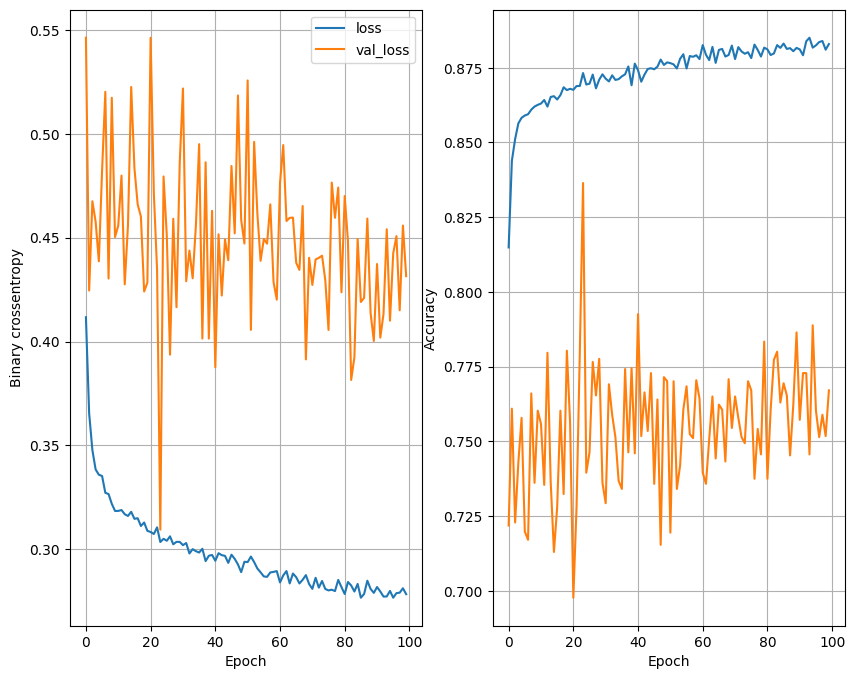

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8781 - loss: 0.3047
64 nodes,dropout 0.2,lr 0.005,batch_size 64


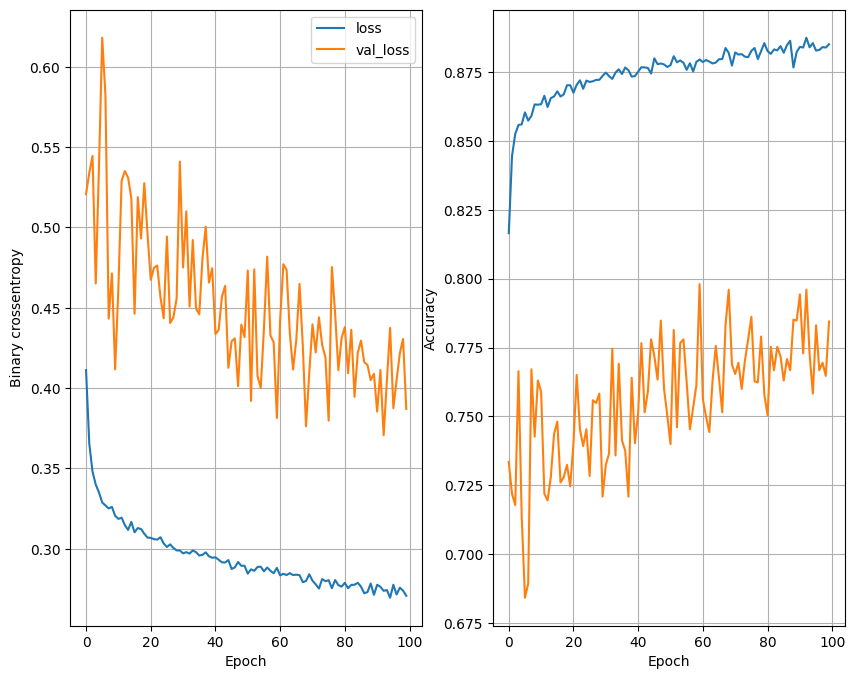

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8792 - loss: 0.3059
64 nodes,dropout 0.2,lr 0.005,batch_size 128


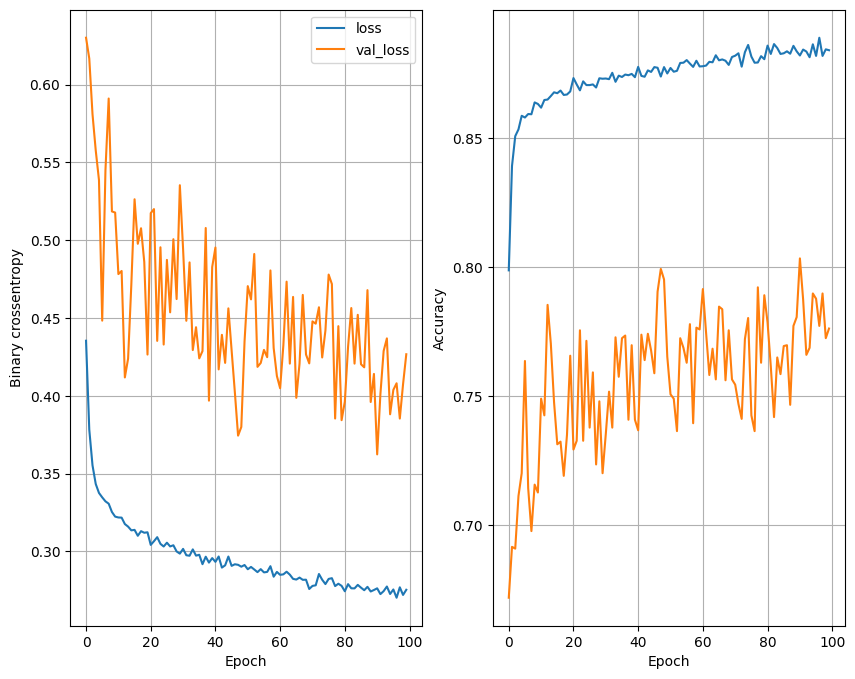

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8787 - loss: 0.2996
64 nodes,dropout 0.2,lr 0.001,batch_size 32


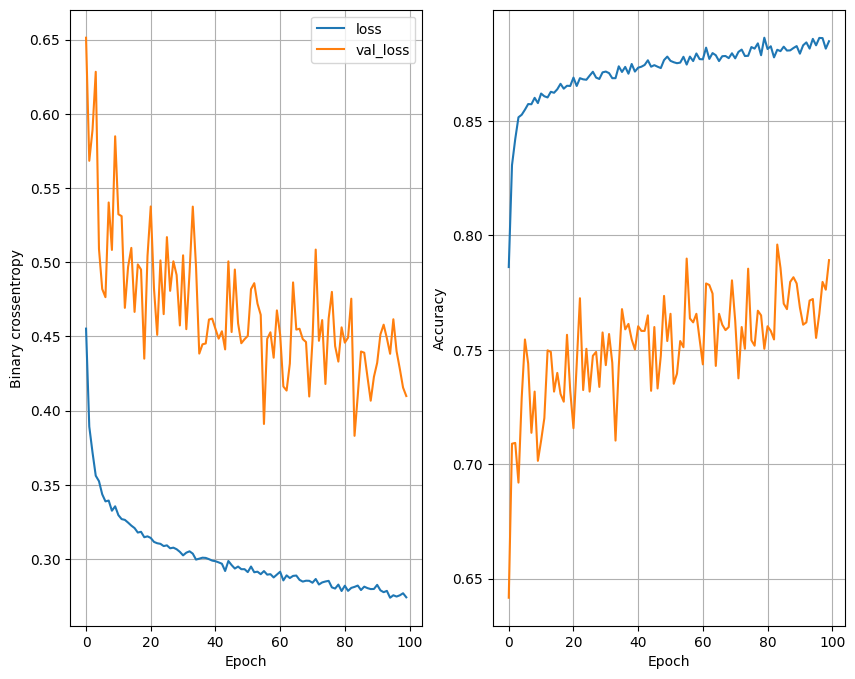

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8798 - loss: 0.3022
64 nodes,dropout 0.2,lr 0.001,batch_size 64


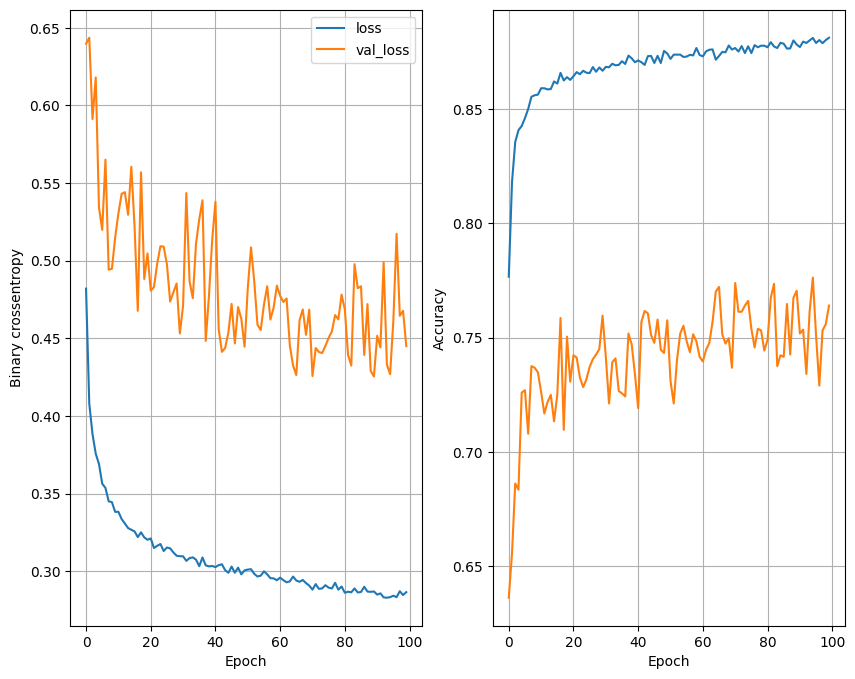

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3007
64 nodes,dropout 0.2,lr 0.001,batch_size 128


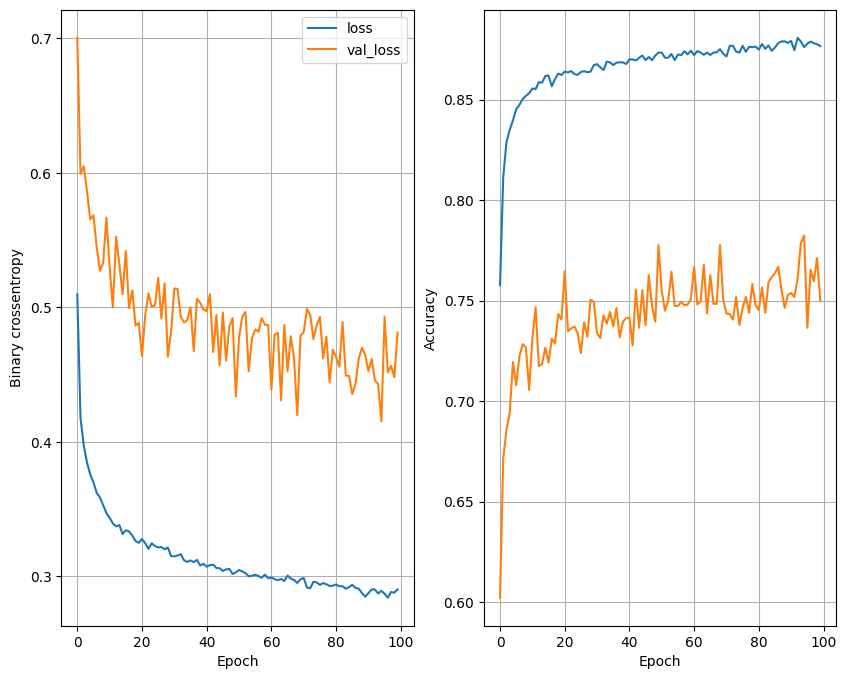

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8829 - loss: 0.2958


In [52]:
least_val_loss=float('inf')
least_loss_model=None

epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f'{num_nodes} nodes,dropout {dropout_prob},lr {lr},batch_size {batch_size}')
                model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)
                if val_loss[0] < least_val_loss:
                  least_val_loss=val_loss[0]
                  least_loss_model=model

In [53]:
y_pred=least_loss_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1286
           1       0.88      0.94      0.91      2518

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

